<h2>Data import & inspection</h2>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as sty
import seaborn as sns


In [81]:
# importing
sales = pd.read_csv('product_sales.csv')

# Shape and state at import, before any modification
print(sales.shape)
sales.info()
# Revenue has probably missing values

(15000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [82]:
sales.describe().round(2)

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.00,15000.00,13926.00,15000.00,15000.00
mean,3.10,10.08,93.93,4.97,24.99
std,1.66,1.81,47.44,5.04,3.50
min,1.00,7.00,32.54,0.00,12.00
25%,2.00,9.00,52.47,1.00,23.00
50%,3.00,10.00,89.50,3.00,25.00
75%,5.00,11.00,107.33,7.00,27.00
max,6.00,16.00,238.32,63.00,41.00


In [83]:
# Are object cols real text cols?
sales.select_dtypes(include='object').head()

,sales_method,customer_id,state
0,Email,2e72d641-95ac-497b-bbf8-4861764a7097,Arizona
1,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,Kansas
2,Call,d1de9884-8059-4065-b10f-86eef57e4a44,Wisconsin
3,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,Indiana
4,Email,10e6d446-10a5-42e5-8210-1b5438f70922,Illinois


In [84]:
# help(df.select_dtypes)
sales.select_dtypes(include=['number']).head()
# There are missing values in revenue visible

,week,nb_sold,revenue,years_as_customer,nb_site_visits
0,2,10,NaN,0,24
1,6,15,225.47,1,28
2,5,11,52.55,6,26
3,4,11,NaN,3,25
4,3,9,90.49,0,28


<h2>Section 1</h2>

<h2>Data validation</h2>
<p>
Describe validation and cleaning steps for every column in the data.
</p>

<ul>
  <li><strong>Data Validation</strong>
    <ul>
      <li>Detect missing values.</li>
      <li>Identify duplicate records.</li>
      <li>Ensure columns match expected data types.</li>
      <li>Check for inconsistent formats in text, dates, or numerical values.</li>
      <li>Handle outliers using statistical methods or domain knowledge.</li>
      <li>Check for invalid or unrealistic values.</li>
    </ul>
  </li>
  <li><strong>Data Cleaning</strong>
    <ul>
      <li>Impute missing values using mean, median, or mode.</li>
      <li>Remove rows or columns with excessive missing data.</li>
      <li>Remove duplicate records.</li>
      <li>Standardize text data (e.g., consistent capitalization or spelling).</li>
      <li>Unify formats for dates, times, and numerical values.</li>
      <li>Correct typos or unify categories in categorical data.</li>
      <li>Normalize or scale numerical data.</li>
      <li>Remove irrelevant or unnecessary columns or rows.</li>
    </ul>
  </li>
  <li><strong>Comments</strong>
    <ul>
      <li>Comment on changes for reproducibility.</li>
    </ul>
  </li>
</ul>


In [85]:

def check_alignment(df, col):
        '''Checking alignment of data description with the given variable'''
        
        # data type
        print(f'The data type: {df[col].dtype}')


        print(f'Length of the df: {df.shape[0]}')
        print(f'Length of the variable: {len(df[col])}')

        # number of unique values
        n_uniques = df[col].unique()
        print(f'Number of unique values: {len(n_uniques)}')
        
        # unique values
        # unique_values = df[col].unique()
        # print(f'Number of unique values: {unique_values}')

        duplicates = df[col].duplicated().sum()
        print(f'Number of duplicate values: {duplicates}')

        # How many missing values?
        missing_values = df[col].isnull().sum()
        print(f'Number of missing values: {missing_values}')
        

<h3>Variable: week</h3>


<p>
<strong>week:</strong><br>
    <strong>Description:</strong> "The week in which the sale was made, counted as weeks since the product launch."<br>
    <strong>Modifications:</strong><br>
    - "Data Type": "The actual data type ('int64') aligns with the indicated data type ('int') from the table description."<br>
    - "Value Range": "The variable 'week' consists of 6 integers, with a minimum value of 1 and a maximum value of 6, with no gaps in the sequence."<br>
    - "Consistency": "The values are consistent and meaningful, with no missing values." <br>
    - "Result": "Cleaning is not necessary, and the number of rows remained constant."

</p>

In [86]:
check_alignment(sales, "week")

The data type: int64
Length of the df: 15000
Length of the variable: 15000
Number of unique values: 6
Number of duplicate values: 14994
Number of missing values: 0


In [87]:
sales["week"].describe().round(2)

count    15000.00
mean         3.10
std          1.66
min          1.00
25%          2.00
50%          3.00
75%          5.00
max          6.00
Name: week, dtype: float64

<h4>Check data type alignment</h4>

<p>
The actual data type "int64" is aligned with the indicated data type "int" from the table description: "Week sale was made, counted as weeks since product launch." The word "counted" indicates an integer.
</p>

<h4>Missing values?</h4>

<p>
No missing values exist in this variable.
</p>

<h4>Is the variable consistent and meaningful?</h4>

In [88]:
# print(sales.info())
weeks_sorted = sorted(sales['week'].unique())
print(weeks_sorted)
print('6 Weeks: "Week sale was made, counted as weeks since product launch.\nNo breaks in the sequence.')

[1, 2, 3, 4, 5, 6]
6 Weeks: "Week sale was made, counted as weeks since product launch.
No breaks in the sequence.


<h4>Variable: sales_method</h4>
<p>
<strong>sales_method:</strong><br>
<strong>Description:</strong> Character, indicating which of the three sales methods was used for that customer.<br>
<strong>Modifications:</strong><br>
<strong>Number of rows:</strong> The dataset initially contained 15,000 rows. Even after cleaning, the number of rows remained constant, and there were no missing values.<br>
<strong>Data Type:</strong> The actual data type, "object," aligns with the described data type, "character," in the table.<br>
<strong>Synonyms:</strong> Synonyms in this variable were corrected by replacing values such as "em + call" and "email" with the standardized terms "Email + Call" and "Email." This consolidation reduced the number of unique values from 5 to 3: "Call + Email," "Call," and "Email."<br>
<strong>Consistency & Meaningfulness:</strong> After cleaning for synonyms, the variable is now consistent and meaningful. The sales method is a core variable for this project and essential for addressing the research questions.
</p>


In [89]:
check_alignment(sales, "sales_method")

The data type: object
Length of the df: 15000
Length of the variable: 15000
Number of unique values: 5
Number of duplicate values: 14995
Number of missing values: 0


In [90]:
sales["sales_method"].describe()

count     15000
unique        5
top       Email
freq       7456
Name: sales_method, dtype: object

<h4>Check data type alignment</h4>

<p>
The actual data type "object" is aligned with the data type "character" from the table description .
</p>

<h4>Missing values?</h4>

<p>No missing values exist in this variable.</p>

<h4>Are the values consistent and meaningful?</h4>
<p>
After cleaning for synonyms the variable is now consistent and meaningful. Sales method is a core variable for this project and essential for the research questions.
</p>


<h4>Checking for synonyms!</h4>


In [91]:
# Are there any misspellings in the object-string vars?
# Checking and replacing: 'sales_method'

sales['sales_method'].value_counts()

sales['sales_method'] = sales['sales_method'].replace({'email':'Email','em + call':'Email + Call'})

print(sales['sales_method'].unique())
print(sales['sales_method'].value_counts())
print('After replacing only 3 methods are left.')

['Email' 'Email + Call' 'Call']
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64
After replacing only 3 methods are left.


<h3>Variable: customer_id</h3>

<p>
<strong>customer_id:</strong><br>
    <strong>Description:</strong> "A character variable serving as a unique identifier for customers."<br>
    <strong>Modifications:</strong><br>
    - "Data Type": "The actual data type ('object') aligns with the described type ('character') in the table."<br>
    - "Uniqueness Check": "All customer IDs were verified as unique, with no duplicates found."<br>
    - "Missing Values": "No missing values were present in this variable."<br>
    - "Consistency": "As a unique identifier, the values are consistent and require no cleaning."<br>
    - "Result": "The number of rows remained constant throughout the analysis."<br>


</p>

In [92]:
check_alignment(sales, "customer_id")

The data type: object
Length of the df: 15000
Length of the variable: 15000
Number of unique values: 15000
Number of duplicate values: 0
Number of missing values: 0


In [93]:
sales["customer_id"].describe()

count                                    15000
unique                                   15000
top       2e72d641-95ac-497b-bbf8-4861764a7097
freq                                         1
Name: customer_id, dtype: object

<h4>Check data type alignment</h4>

<p>
The actual data type "object" is aligned with the data type "character" from the table description .
</p>

<h4>Missing values?</h4>

<p>No missing values exist in this variable.</p>

<h4>Checking for duplicates</h4>

In [94]:
id_duplicated_sum = sales.duplicated(subset='customer_id').sum()
print("No values are duplicated", id_duplicated_sum)

print("The customer Id's are unique identifiers and therefore all 15.000 are unique values and not duplicated.")
print(sales['customer_id'].nunique())
print(sales.shape[0])

No values are duplicated 0
The customer Id's are unique identifiers and therefore all 15.000 are unique values and not duplicated.
15000
15000




<b>Checking duplicates for the whole df.</b>

In [95]:
# Are complete records duplicates?
col_names = sales.columns.tolist()

duplicates_in_df = sales[sales.duplicated(subset=col_names)]

print(duplicates_in_df.shape)
print(duplicates_in_df)
# None duplicate records

(0, 8)
Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [96]:
print("The customer Id's are unique identifiers and therefore all rows in the df are unique.")
print(sales['customer_id'].nunique())
print(sales.shape[0])

The customer Id's are unique identifiers and therefore all rows in the df are unique.
15000
15000


<h4>Are the values consistent and meaningful?</h4>

<p>
As unique identifiers the the values consistent and meaningful.
</p>

<h3>Variable: nb_sold</h3>

<p>
<strong>nb_sold:</strong><br>
<strong>Description:</strong><br> 
Numeric, representing the number of new products sold.<br> 
<strong>Modifications:</strong><br>
Initially, the dataset contained 15,000 rows. The actual data type, "int64," aligns with the described data type, "numeric," in the table. No missing values were found.<br>
<strong>Outlier-analysis:</strong><br>Outliers were identified using the Z-score method (threshold: 3), resulting in the removal of 31 outliers. Consequently, the maximum value decreased from 16 to 15, reducing the dataset to 14,969 rows.<br>
<strong>Consistency & Meaningfulness:</strong><br>
The variable's range, with a mean of approximately 10, is reasonable. The initial 10 unique values, ranging from a minimum of 7 to a maximum of 16, highlight interesting customer purchase behavior, warranting further investigation. The variable is meaningful as the number of products sold is a key metric in business data analysis.
</p>


In [97]:
check_alignment(sales, "nb_sold")

The data type: int64
Length of the df: 15000
Length of the variable: 15000
Number of unique values: 10
Number of duplicate values: 14990
Number of missing values: 0


In [98]:
sales["nb_sold"].describe().round(2)

count    15000.00
mean        10.08
std          1.81
min          7.00
25%          9.00
50%         10.00
75%         11.00
max         16.00
Name: nb_sold, dtype: float64

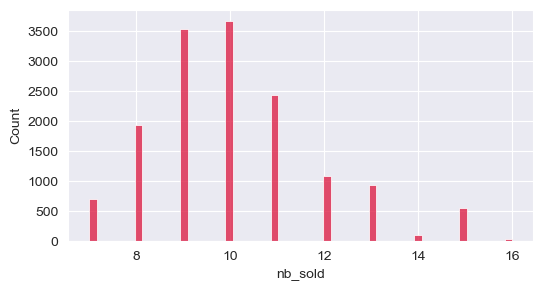

In [99]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.histplot(data=sales, x="nb_sold", color='crimson')
plt.show()

<h4>Check data type alignment</h4>

<p>
The actual data type "int64" is aligned with the data type "numeric" from the table description .
</p>

<h4>Missing values?</h4>

<p>No missing values exist in this variable.</p>

<h4>Outlier analysis</h4>

In [100]:
print(sales["nb_sold"].describe())
print(f"The statistics indicate there are no outliers.")

count    15000.000000
mean        10.084667
std          1.812213
min          7.000000
25%          9.000000
50%         10.000000
75%         11.000000
max         16.000000
Name: nb_sold, dtype: float64
The statistics indicate there are no outliers.


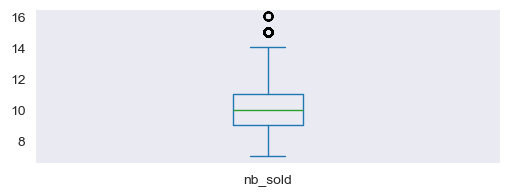

In [101]:
plt.figure(figsize=(6,2))
sales["nb_sold"].plot.box()
plt.grid()
plt.show()

<h4>Detecting and removing outliers</h4>

<p>using the Z-score-method</p>

In [102]:
nb_sold_df = pd.DataFrame(sales["nb_sold"])
# print(nb_sold_df)

nb_sold_mean = sales["nb_sold"].mean()
nb_sold_stdev = sales["nb_sold"].std()

# calculate z-scores
nb_sold_df["z_score"] = (nb_sold_df['nb_sold'] - nb_sold_mean) / nb_sold_stdev

threshold = 3
# nb_sold_df["outlier"] = nb_sold_df["z_score"].abs() > threshold

nb_sold_df["outlier"] = nb_sold_df["z_score"].apply(lambda x: 1 if abs(x) > threshold else 0)

# print(nb_sold_df.head())
# print(nb_sold_df['outlier'].value_counts())
# print(nb_sold_df.index.tolist())

nb_sold_df_outliers = nb_sold_df[nb_sold_df['outlier'] == 1]
# print(nb_sold_df_outliers.shape)
nb_sold_df_outliers_index = nb_sold_df_outliers.index.tolist()

sales_2 = sales.copy()
sales_2 = sales_2.drop(index=nb_sold_df_outliers_index)
print(sales.shape)
print(sales_2.shape)
print(f'N-outliers: {len(nb_sold_df_outliers_index)}')

(15000, 8)
(14969, 8)
N-outliers: 31


In [103]:

def remove_outliers_zscore(df, column, threshold=3):
    """
    Removes rows from a DataFrame where the z-score of a given column exceeds a threshold.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        column (str): Column to analyze for outliers.
        threshold (float, optional): Z-score threshold for   identifying outliers. Default is 3.
        
    Returns:
        pd.DataFrame: A new DataFrame with outliers removed.
    """
    # Copy the DataFrame to avoid modifying the original
    df = df.copy()

    # Calculate z-scores
    mean = df[column].mean()
    std = df[column].std()
    df["z_score"] = (df[column] - mean) / std

    # Identify outliers based on the threshold
    outlier_indices = df[df["z_score"].abs() > threshold].index
    n_outliers = len(outlier_indices)
    # Remove outliers
    filtered_df = df.drop(index=outlier_indices)

    # Drop the z_score column from the result
    filtered_df = filtered_df.drop(columns=["z_score"])
    
    return filtered_df, n_outliers


In [104]:
filtered_df_nb_sold = remove_outliers_zscore(sales, "nb_sold", threshold=3)
print(filtered_df_nb_sold[0].shape)
print(f'N-outliers: {filtered_df_nb_sold[1]}')

(14969, 8)
N-outliers: 31


In [105]:
sales_2 = filtered_df_nb_sold[0].copy()
print(type(sales_2))
# sales_2.info()

<class 'pandas.core.frame.DataFrame'>


In [106]:
# print(sales["nb_sold"].describe())

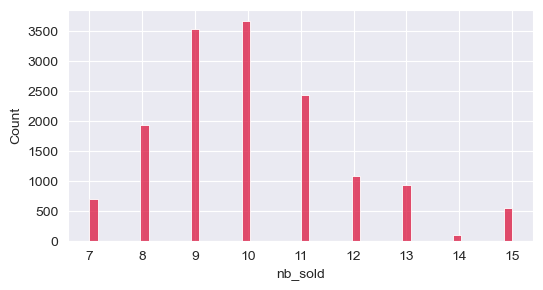

In [107]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.histplot(data=sales_2, x="nb_sold", color='crimson')
plt.show()

<h4>Is the variable consistent and meaningful?</h4>

<p>
The range of the variable with a mean of ca. 10 makes sense. The number of initially 10 unique values with a minimum of 7 and a maximum 16 indicates an interesting customer purchase behavior, which values further investigation. The variable is meaningful as number of products sold is an essential feature in business data analysis.
</p>

<h3>Variable: Revenue</h3>
<p>
    <strong>Revenue:</strong><br>
    <strong>Description:</strong> Numeric; represents the number of new products sold.<br>
    <strong>Modifications:</strong><br>
    The data type described as "numeric" aligns with the actual data type, "float64".<br>
The variable was round to 2 decimal places in alignment with  the table description.<br> 
    The variable <code>revenue</code> contained 1,073 missing values out of 14,969 rows, resulting in a missing data proportion of approximately 7.15%. Since this exceeds the common 5% threshold for acceptable missing values, simply dropping the rows may not be ideal. Moreover, <code>revenue</code> is a critical feature in many business analysis projects.<br><br>
    To assess the nature of the missing values, two research questions were formulated:<br>
    <ol>
        <li><strong>Are the missing values in <code>revenue</code> dependent on other variables, or are they missing at random?</strong><br>
            To address this, a T-test was conducted between the variables <code>nb_sold</code> and <code>revenue</code>. The resulting p-value of <code>5.16 × 10<sup>-23</sup></code> strongly indicates a relationship between the two variables, leading to the rejection of the null hypothesis. This confirms that the missing values in <code>revenue</code> are <strong>not missing at random (NMAR)</strong> but are instead dependent on other factors.
        </li>
        <li><strong>What are suitable methods for imputing the missing values?</strong><br>
            Since the missing values are NMAR, simple imputation techniques like using the mean or median are not appropriate. Instead, pattern-based imputation methods such as interpolation or k-nearest neighbors (KNN) are more suitable.<br>
            In this case, the <strong><code>KNNImputer</code> from the <code>scipy</code> library</strong> was chosen. It predicts and fills missing values based on patterns determined by the KNN algorithm, utilizing previously selected features for imputation.
        </li>
    </ol>
    An outlier analysis was performed using a user-defined function, <code>remove_outliers</code>. No significant outliers were detected.<br>
    After completing the imputation and validation process, the dataset retained 14,969 rows with 8 variables. After conducting the cleaning operations the revenue values are now consistent and aligned with the other features. Revenue is an important and meaningful business analysis feature.
</p>















In [108]:
check_alignment(sales_2, "revenue")

The data type: float64
Length of the df: 14969
Length of the variable: 14969
Number of unique values: 6714
Number of duplicate values: 8255
Number of missing values: 1073


<h4>Check alignment</h4>

<p>
The actual data type "float64" is aligned with the data type "numeric" from the table description .
</p>

In [109]:
sales_2["revenue"] = sales_2["revenue"].round(2)

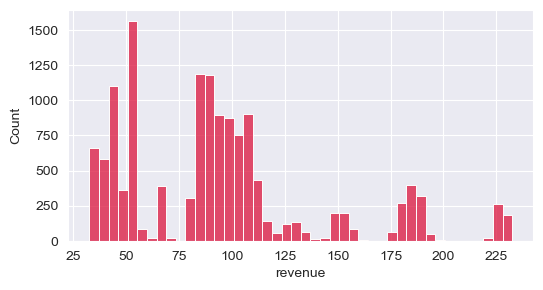

In [110]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.histplot(data=sales_2, x="revenue", color='crimson')
plt.show()

<h4>Missing values analysis of revenue</h4>

<p>
    Understanding the nature of missingness in data is essential for choosing the right handling method. Missing data can be categorized as:
</p>
<ul>
    <li><strong>Missing Completely at Random (MCAR):</strong> Missing values are unrelated to other variables.</li>
    <li><strong>Missing at Random (MAR):</strong> Missing values are related to observed data but not the missing data itself.</li>
    <li><strong>Not Missing at Random (NMAR):</strong> Missing values are related to the missing data itself.</li>
</ul>
<p>
    Identifying the type of missingness helps in selecting the appropriate imputation method to avoid bias.
</p>


In [111]:
# Checking missing values again
sales_2["revenue"].isnull().sum()

1073

In [112]:
print(sales_2.isnull().sum())

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1073
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


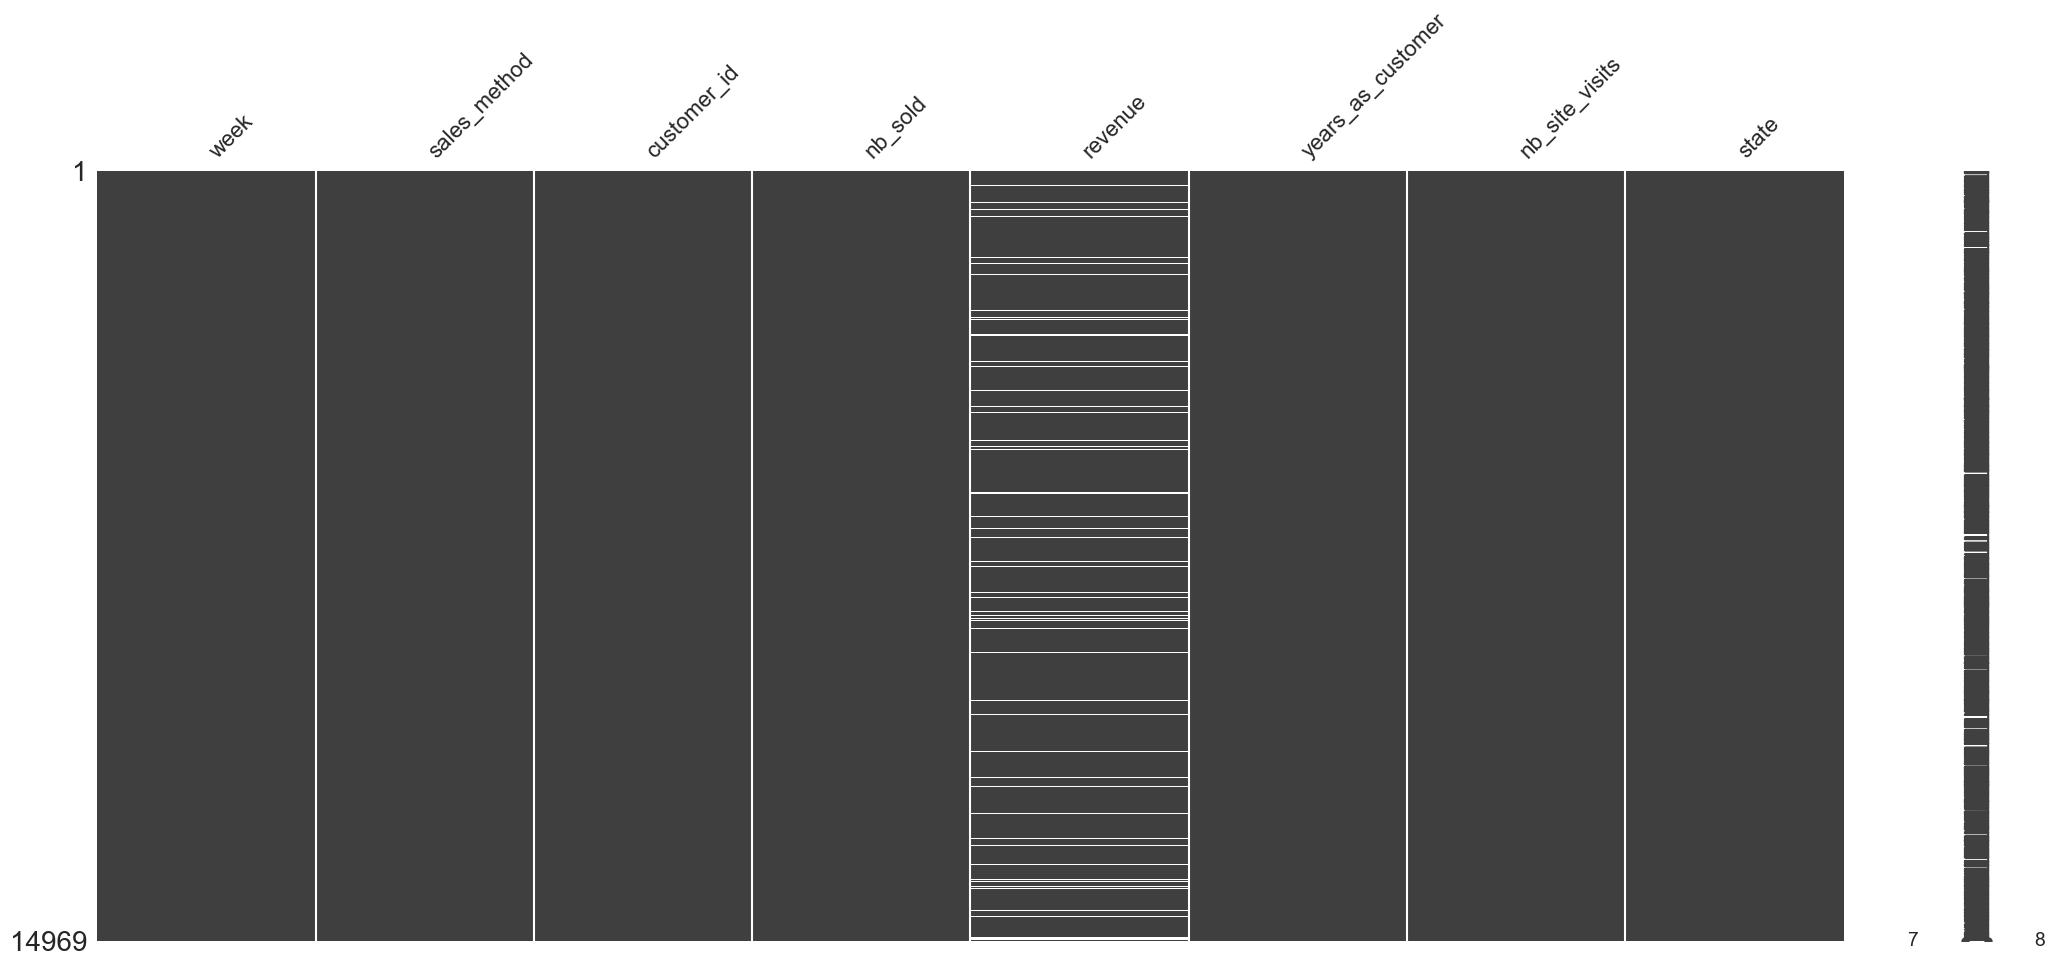

In [113]:
# sales_2.info()
import missingno as msno

msno.matrix(sales_2)
plt.show()

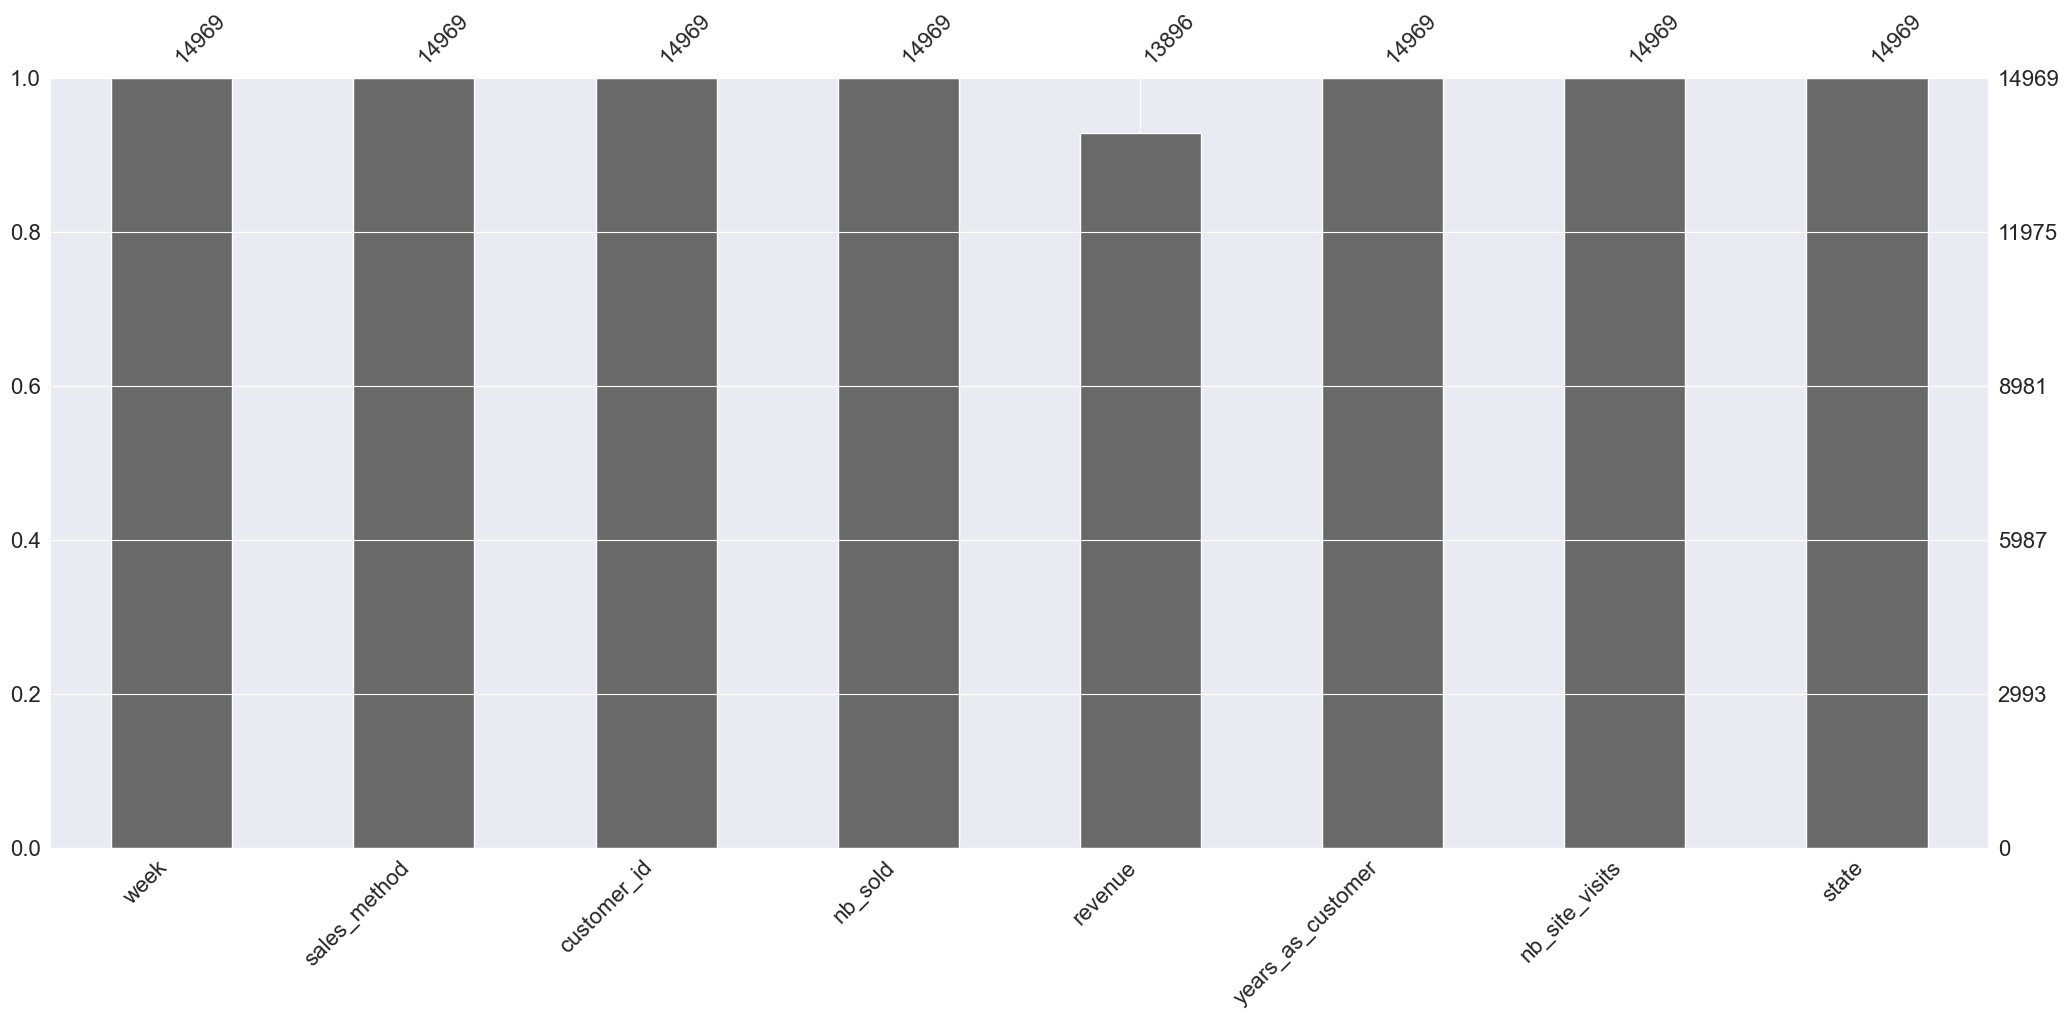

In [114]:
msno.bar(sales_2)
plt.show()

<h3>Dropping Missing Values or imputing?</h3>
<ul>
<li>
Small Proportion of Missing Data: If the number of missing values is small relative to the dataset (e.g., less than 5%), and the rows or columns with missing values are not critical, dropping may be acceptable.<br>
<b>Reasoning:</b><br>
The proportion is ca. 7.15% and above 5%. Dropping may be not acceptable.
</li>  
<li>
Non-essential Features: If the column with missing values is not important for the analysis or model, droping is entirely acceptable.<br>
<b>Reasoning:</b><br>
Revenue is an essential business analysis feature. Dropping may be not acceptable.
</li>    
</ul>

In [115]:
missing_values_percent = round((1073/15000)*100, 2)
print(missing_values_percent)

7.15


<h4>Are the missing values in "revenue" dependent on other variables or missing at random?</h4>

<p>
A p-value of 5.1633107753045296e-23 indicates that it is highly unlikely to observe a p-value so small if the Null-Hypothesis would be true. In this case the alternative hypothesis is accepted. There is relationship between the variables.
</p>

<p>
This indicates the values are not missing at random, but are dependent. In this case mean or median are not good imputing methods. Instead methods identifying patterns like interpolate or KNN are better methods.
</p>


In [116]:
from scipy import stats

# Compare `revenue` missing vs. non-missing values on other numerical features
missing = sales_2[sales_2['revenue'].isnull()]['nb_sold']
non_missing = sales_2[sales_2['revenue'].notnull()]['nb_sold']

t_stat, p_value = stats.ttest_ind(missing, non_missing, equal_var=False)
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 10.083703681194045, p-value: 5.1633107753045296e-23


In [117]:
sales_2_numbers = sales_2.select_dtypes(include='number')

sales_2_numbers_corrs = sales_2_numbers.corr().round(2)

sales_2_numbers_corrs['revenue']

week                 0.35
nb_sold              0.69
revenue              1.00
years_as_customer   -0.06
nb_site_visits       0.32
Name: revenue, dtype: float64

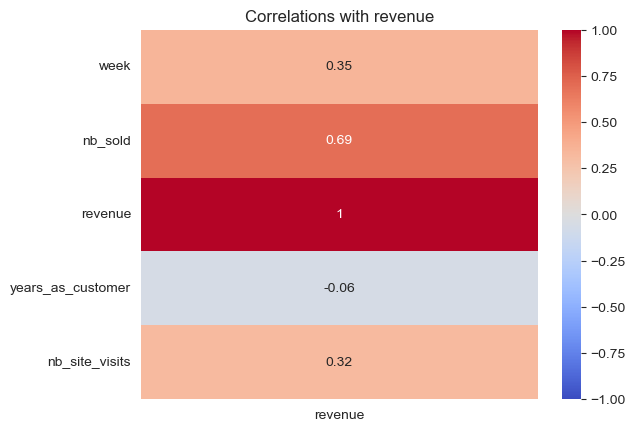

In [118]:
revenue_corr = sales_2_numbers_corrs[['revenue']]

sns.heatmap(revenue_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlations with revenue")
plt.show()


<p>
Features with high correlations are: 'nb_sold', 'nb_site_visits', 'week'.
</p>

<h4>KNNImputer</h4>

<p>replaces null values with predictions based on patterns determined by the KNN-algorithm using the features selected before.
</p>

In [119]:
from sklearn.impute import KNNImputer


# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)  

# Select relevant columns for imputation (e.g., 'nb_sold', 'revenue')
# You can add more columns if needed for better imputation
columns_to_impute = ['nb_sold', 'nb_site_visits', 'week', 'revenue']

# Fit and transform the data using the KNN imputer
sales_imputed = sales_2.copy()  # Create a copy to preserve the original data
sales_imputed[columns_to_impute] = knn_imputer.fit_transform(sales_imputed[columns_to_impute])

# Check the result
print(sales_imputed.shape)
print(sales_2.shape)


sales_3 = sales_imputed.copy()

(14969, 8)
(14969, 8)


<p>The number of rows stays constant, because all missing values are imputed and not dropped. </p>

<h4>Outlier-Analysis of revenue</h4>

In [120]:
filtered_df_revenue = remove_outliers_zscore(sales_3, "revenue", threshold=3)

print(filtered_df_revenue[0].shape)
print(f'N-outliers: {filtered_df_revenue[1]}')
print('No outliers detected.')

(14969, 8)
N-outliers: 0
No outliers detected.


<h4>Are the values consistent and meaningful?</h4>
<p>
After conducting the cleaning operations the revenue values are now consistent and aligned with the other features. Revenue is an important and valuable business analysis feature.
</p>

<h3>Variable: years_as_customer</h3>

<p>
<strong>years_as_customer:</strong><br> 
<strong>Description:</strong><br> 
Numeric, representing the number of years a customer has been buying from the company (founded in 1984).<br> 

<strong>Modifications:</strong><br>
- **Initial Dataset**: 14,969 rows and 8 variables. No missing values were present in this variable.
- **Logical Consistency**: Since the company is 40 years old as of 2024, values above 40 are impossible. Upon investigation, two invalid entries (indices 13741 and 13800 with values 63 and 47) were identified and removed, reducing the dataset to 14,967 rows.
- **Outlier Analysis**: Using the Z-score method (threshold of 4), 102 outliers were removed. This reduced the dataset to 14,865 rows and decreased the right-skew of the distribution.
- **Result**: The cleaned data is logically consistent and more representative of the customer population.

<strong>Implications:</strong><br>
- Customers with values greater than 40 years were corrected to align with business logic.
- Long-term customers (outliers) have a disproportionate impact on the distribution. While excluded from general analysis, they should be considered a special customer segment for targeted marketing and product offerings. They may not align well with the new product line.
</p>
- 

In [121]:
check_alignment(sales_3, "years_as_customer")

The data type: int64
Length of the df: 14969
Length of the variable: 14969
Number of unique values: 42
Number of duplicate values: 14927
Number of missing values: 0


In [122]:
sales_3["years_as_customer"].describe().round(2)

count    14969.00
mean         4.97
std          5.05
min          0.00
25%          1.00
50%          3.00
75%          7.00
max         63.00
Name: years_as_customer, dtype: float64

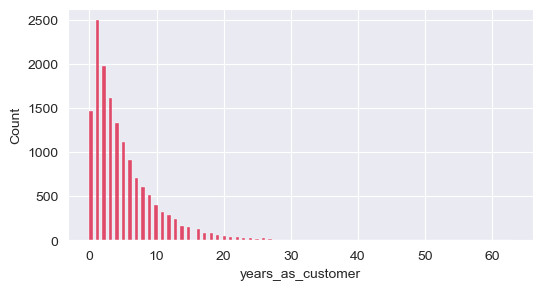

In [123]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.histplot(data=sales_3, x="years_as_customer", color='crimson')
plt.show()

<h4>Check alignment</h4>

<p>
The actual data type "int64" is aligned with the data type "numeric" from the table description.
</p>

<h4>Missing values?</h4>

<p>No missing values exist in this variable.</p>

<h4>Cleaning data entry errors in the variable years_as_customer</h4>


<p>
There is a hint in the information:<br>
"company founded in 1984".<br>
Why is it there?
</p>

<p>How old is the company "Pens and Printers"?</p>

In [124]:
pens_founded = 2024 - 1984 
print(pens_founded)

40


In [125]:
# What is the maximum value?
print(sales_3["years_as_customer"].max())
print(pens_founded - sales_3["years_as_customer"].max())
print("The maximum value is greater than the company lifetime.")

63
-23
The maximum value is greater than the company lifetime.


<p>
<b>Finding:</b><br>
The maximum value is greater than the company lifetime. This is logically impossible and indicates a mistake, perhaps a data entry error.
</p>

<h4>Are there more values above or equal 40?</h4>

In [126]:
yac_above_40 = \
sales_3[sales_3['years_as_customer'] >= 40]

yac_above_40

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2.0,Email,18919515-a618-430c-9a05-2c7d8fea96af,10.0,97.22,63,24.0,California
13800,4.0,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10.0,50.47,47,27.0,California


In [127]:
print(yac_above_40.shape)
print("There are 2 values with yac above 40. As these are not logical possible, these should be removed.")

(2, 8)
There are 2 values with yac above 40. As these are not logical possible, these should be removed.


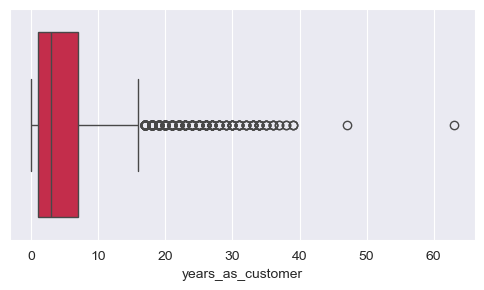

In [128]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.boxplot(data=sales_3, x="years_as_customer", color='crimson')
plt.show()

In [129]:
# Remove entries where 'years_as_customer' is 40 or greater
sales_3 = sales_3[sales_3['years_as_customer'] < 40]

# Check if the removal was successful
only_below_40_df = sales_3[sales_3['years_as_customer'] >= 40]

if  only_below_40_df.empty:
    print("\nThe empty DataFrame confirms that entries with 'years_as_customer'>=40\nwere removed.")
else:
    print('Removing was not successful.')



The empty DataFrame confirms that entries with 'years_as_customer'>=40
were removed.


In [130]:
print(sales_3.shape)

(14967, 8)


<h4>Outlier-analysis</h4>

<p>
using the Z-score method with a threshold of 4 from above.
</p>



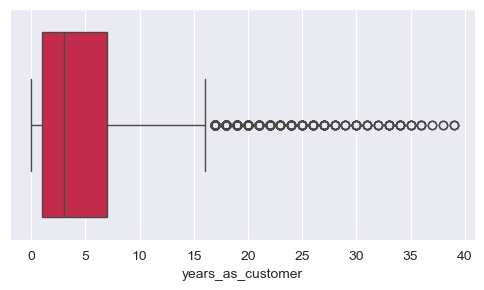

In [131]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.boxplot(data=sales_3, x="years_as_customer", color='crimson')
plt.show()

In [132]:
sales_3_outliers_removed_tuple =\
remove_outliers_zscore(df=sales_3, column="years_as_customer", threshold=4)

sales_3_outliers_removed_df = sales_3_outliers_removed_tuple [0]
print(sales_3_outliers_removed_df.shape)
sales_3_outliers_removed_df.head()

sales_3_n_outliers_removed = sales_3_outliers_removed_tuple[1]
print(sales_3_n_outliers_removed )



(14865, 8)
102


In [133]:
sales_3_outliers_removed_df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2.0,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10.0,98.400,0,24.0,Arizona
1,6.0,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15.0,225.470,1,28.0,Kansas
2,5.0,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11.0,52.550,6,26.0,Wisconsin
3,4.0,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11.0,110.945,3,25.0,Indiana
4,3.0,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9.0,90.490,0,28.0,Illinois


In [134]:
sales_3 = sales_3_outliers_removed_df.copy()

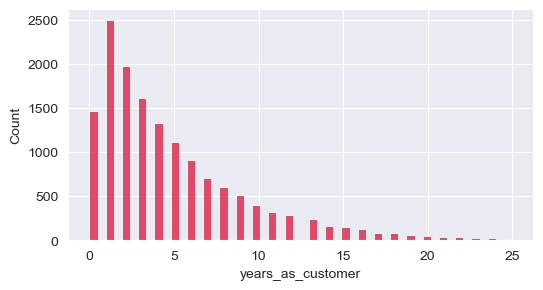

In [135]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.histplot(data=sales_3, x="years_as_customer", color='crimson')
plt.show()

In [136]:
sales_3["years_as_customer"].describe().round(2)

count    14865.00
mean         4.79
std          4.56
min          0.00
25%          1.00
50%          3.00
75%          7.00
max         25.00
Name: years_as_customer, dtype: float64

<b>Finding:</b>

<p>Removing the outliers reduced the range further between 1 and 25.<br>
This allows for a more targeted marketing  & sales campaign, when introducing the new product line.
</p>


<h4>Are the values consistent and meaningful?</h4>

<p>
After cleaning the values are consistent and meaningful. Dropping values greater 40 makes the variable logical consistent. Removing the outliers reduces the impact of the long-term customers on the data distribution. Long-term-customers should be treated as special customer segment and be addressed with targeted products and marketing actions and may not be capture with the new product line on offer. 
</p>

<h3>Variable: state</h3>
<p>
    <strong>Variable: state:</strong><br>
    <strong>Description:</strong><br>
    Character, location of the customer (i.e., where orders are shipped).<br>
    <strong>Modifications:</strong><br>
    - "Initial Dataset": 14865 rows and 8 variables. No missing values were present in this variable. No cleaning was necessary, and the number of rows stayed consistent.<br>
    - "Logical Consistency": The list of states was inspected for synonyms and errors. The list is correct in terms of state names, with no errors or misspellings. It includes the 50 U.S. states, and there are no synonyms or mistakes in the names provided. Thus, the variable is consistent with official nomenclature. The variable is meaningful for business data analysis, as grouping by state is a common aggregation for sales.<br>
    - "Result": The top five states in terms of count are: "California", "Texas", "New York", "Florida", "Illinois". The variable is logically consistent and useful for further exploration.
</p>


In [137]:
check_alignment(sales_3, "state")

The data type: object
Length of the df: 14865
Length of the variable: 14865
Number of unique values: 50
Number of duplicate values: 14815
Number of missing values: 0


In [138]:
sales_3["state"].describe()

count          14865
unique            50
top       California
freq            1853
Name: state, dtype: object

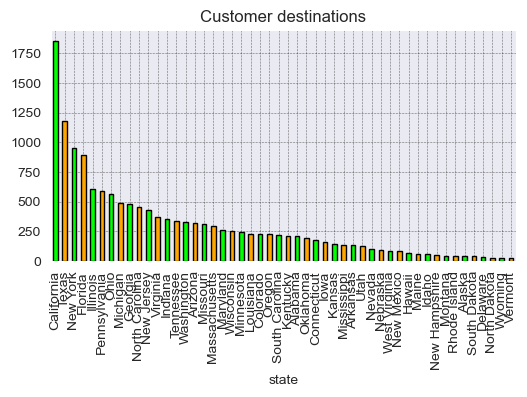

In [139]:
sales_3['state'].value_counts().plot.bar(figsize=(6,3), edgecolor='black',
                                        color=['lime', 'orange'], 
                                        title="Customer destinations")
plt.grid(True, color = "black", linewidth = "0.4", linestyle = ":")
plt.show()

In [140]:
# Checking the state var
print(sales_2['state'].value_counts()[:10])

state
California        1868
Texas             1186
New York           961
Florida            901
Illinois           617
Pennsylvania       597
Ohio               565
Michigan           496
Georgia            488
North Carolina     457
Name: count, dtype: int64


<h4>Check alignment</h4>

<p>
The actual data type "object" is aligned with the data type "character" from the table description.
</p>

<h4>Missing values?</h4>

<p>No missing values exist in this variable.</p>

<h4>Are the values consistent and meaningful?</h4>
<p>
After cleaning for synonyms the variable is now consistent and meaningful.
</p>


<h4>Checking for synonyms and missspellings in the state variable.</h4>


In [141]:
# Checking misspellings in the 'state' var

# Preparing the check
state_list = sales_3['state'].tolist()
sales_states = sales_3['state'].unique().tolist()

sales_states = sorted(sales_states)
print(sales_states)


['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


<h4>Finding:</h4><br>

<p>
The list of states was inspected for synonyms and errors.<br>
The list is correct in terms of state names, with no errors or misspellings. It includes the 50 U.S. states, and there are no synonyms or mistakes in the names provided. Thereby the variables are consistent with the official nomenclature. The variable is meaningful for business data analysis as grouping by state is a common aggregation for sales.
</p>

<h3>Variable: nb_site_visits</h3>
<p>
    <strong>Variable: nb_site_visits</strong><br>
    <strong>Description:</strong><br>
    Numeric, representing the number of times the customer has visited our website in the last six months.<br>
    <strong>Modifications:</strong><br>
    - "Initial Dataset": 14,865 rows and 8 variables. No missing values were present in this variable.<br>
    - "Data Type": The data type was changed from "float64" to "int64". It aligns with the described data type, "numeric," from the table description. Since site visits are best represented as whole numbers, the use of an integer data type is appropriate.<br>
    - "Outlier Analysis": Using the Z-score method with a threshold of 3, 30 outliers were identified and removed. This reduced the dataset to 14,835 rows and enhanced the normality of the data distribution.<br>
    - "Consistency and Meaningfulness": The cleaned data is consistent, the range of values is plausible, and the variable exhibits a normal distribution, enabling a variety of analytical approaches. This variable is a common feature in web analytics and provides valuable insights into customer behavior.<br>
</p>


In [142]:
sales_3["nb_site_visits"] = sales_3["nb_site_visits"].astype("int64")

In [143]:
check_alignment(sales_3, "nb_site_visits")

The data type: int64
Length of the df: 14865
Length of the variable: 14865
Number of unique values: 27
Number of duplicate values: 14838
Number of missing values: 0


In [144]:
sales_3["nb_site_visits"].info()

<class 'pandas.core.series.Series'>
Index: 14865 entries, 0 to 14999
Series name: nb_site_visits
Non-Null Count  Dtype
--------------  -----
14865 non-null  int64
dtypes: int64(1)
memory usage: 232.3 KB


In [145]:
sales_3["nb_site_visits"].describe().round(2)


count    14865.00
mean        24.98
std          3.49
min         12.00
25%         23.00
50%         25.00
75%         27.00
max         41.00
Name: nb_site_visits, dtype: float64

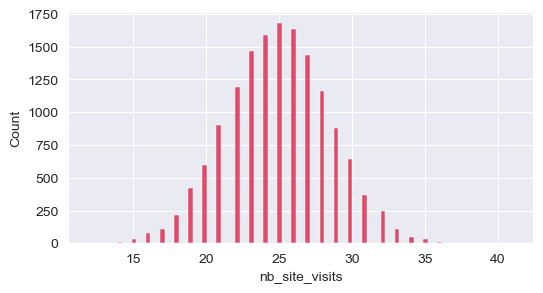

In [146]:
sns.set_style("darkgrid")
plt.figure(figsize=(6, 3))
sns.histplot(data=sales_3, x="nb_site_visits", color='crimson')
plt.show()

<h4>Finding</h4>

<p>
The number of site visits follows a normal distribution with a mean of 25 visits.
</p>

<h4>Check Alignment</h4>
<p>
The data type was changed from "float64" to "int64". It aligns with the described data type, "numeric," from the table description. Since site visits are best represented as whole numbers, the use of an integer data type is appropriate.
</p>


<h4>Missing values?</h4>

<p>No missing values exist in this variable.</p>

<h4>Outlier-analysis</h4>

<p>
using the Z-score method with a threshold of 4 from above.
</p>


In [147]:
nb_site_visits_outliers_removed_tuple =\
remove_outliers_zscore(df=sales_3, column="nb_site_visits", threshold=3)

nb_site_visits_outliers_removed_df = \
nb_site_visits_outliers_removed_tuple[0]

# print(nb_site_visits_outliers_removed_df.info())
print(nb_site_visits_outliers_removed_df.shape)

(14835, 8)


In [148]:
nb_site_visits_n_outliers = \
nb_site_visits_outliers_removed_tuple[1]

print(nb_site_visits_n_outliers )

30


In [149]:
sales_3 = nb_site_visits_outliers_removed_df.copy()

<h4>Result</h4>

<p>
Given a threshold of 3, 30 outliers were removed. 14835 rows remained.
</p>

In [150]:
sales_3["nb_site_visits"].describe().round(2)

count    14835.00
mean        24.98
std          3.46
min         15.00
25%         23.00
50%         25.00
75%         27.00
max         35.00
Name: nb_site_visits, dtype: float64

<h3>Additional checks</h3>

<p>Check for inconsistent formats in string variables and standardize text data (e.g., consistent capitalization or spelling).</p>


In [151]:
# Detect rows with leading or trailing whitespace
def whitespaces(var):
        has_whitespace = sales_2[var].str.match(r'^\s|\s$', na=False).any()

        if has_whitespace:
            print("Leading or trailing whitespace detected.")
        else:
            print("No leading or trailing whitespace found.")


In [152]:
whitespaces('state')
whitespaces('sales_method')
whitespaces('customer_id')


No leading or trailing whitespace found.
No leading or trailing whitespace found.
No leading or trailing whitespace found.


In [153]:
# Check if all values are capitalized

is_capitalized_consistent = sales_2['sales_method'].str.istitle().all()
print("is_capitalized_consistent:", is_capitalized_consistent)


is_capitalized_consistent: True


In [154]:
is_capitalized_consistent = sales_2['state'].str.istitle().all()
print("is_capitalized_consistent:", is_capitalized_consistent)

is_capitalized_consistent: True


<h2>Description of the Data Validation:</h2>











<h2>Data Validation Report</h2>

<p>At import, the dataset consisted of <strong>15,000 rows</strong> and <strong>8 columns</strong>.</p>

<p>After cleaning and removing outliers, the dataset consists of <strong>14,865 rows</strong>. The number of columns remains unchanged at 8.</p>

<p>Below are descriptions, assessments, and modifications made for each variable:</p>

<ol>
<li>
    <strong>Variable: week</strong><br>
    <strong>Description:</strong> Represents the week of the sale, measured as weeks since the product launch.<br>
    <strong>Modifications:</strong><br>
    - <strong>Data Type:</strong> The actual data type ("int64") aligns with the described data type ("int") in the table.<br>
    - <strong>Value Range:</strong> The variable contains six integers (1 to 6), with no gaps in the sequence.<br>
    - <strong>Consistency:</strong> The values are consistent and meaningful, with no missing values.<br>
    - <strong>Result:</strong> No cleaning was necessary; the number of rows remained constant.
</li>

<li>
    <strong>Variable: sales_method</strong><br>
    <strong>Description:</strong> Indicates which of the three sales methods was used for the customer.<br>
    <strong>Modifications:</strong><br>
    - <strong>Number of Rows:</strong> No rows were removed; there were no missing values.<br>
    - <strong>Data Type:</strong> The actual data type ("object") aligns with the described data type ("character").<br>
    - <strong>Synonyms:</strong> Synonyms like "em + call" and "email" were replaced with standardized terms, reducing unique values from 5 to 3: "Call + Email," "Call," and "Email."<br>
    - <strong>Consistency:</strong> The cleaned variable is consistent and meaningful, making it a core variable for this project.
</li>

<li>
    <strong>Variable: customer_id</strong><br>
    <strong>Description:</strong> Unique identifier for customers.<br>
    <strong>Modifications:</strong><br>
    - <strong>Data Type:</strong> The actual data type ("object") aligns with the described type ("character").<br>
    - <strong>Uniqueness Check:</strong> All values were verified as unique; no duplicates or missing values were found.<br>
    - <strong>Result:</strong> No cleaning was necessary; the number of rows remained constant.
</li>

<li>
    <strong>Variable: nb_sold</strong><br>
    <strong>Description:</strong> Represents the number of new products sold.<br>
    <strong>Modifications:</strong><br>
    - <strong>Initial Dataset:</strong> 15,000 rows.<br>
    - <strong>Data Type:</strong> The actual data type ("int64") aligns with the described data type ("numeric").<br>
    - <strong>Outlier Analysis:</strong> Outliers identified using the Z-score method (threshold: 3) resulted in the removal of 31 rows. The maximum value decreased from 16 to 15, reducing the dataset to 14,969 rows.<br>
    - <strong>Consistency:</strong> The variable's cleaned range (7 to 15) and mean (~10) are reasonable and meaningful for analysis.
</li>

<li>
    <strong>Variable: revenue</strong><br>
    <strong>Description:</strong> Revenue generated from sales, rounded to 2 decimal places.<br>
    <strong>Modifications:</strong><br>
    - <strong>Missing Values:</strong> 1,073 missing values (~7.15%) were imputed using the <code>KNNImputer</code> from the <code>scipy</code> library, as the values were determined to be NMAR.<br>
    - <strong>Outlier Analysis:</strong> No significant outliers were found.<br>
    - <strong>Result:</strong> Imputed values align with the dataset, maintaining 14,969 rows.<br>
    - <strong>Implications:</strong> Revenue is a key variable for business analysis, and its consistency post-imputation supports reliable analytics.
</li>

<li>
    <strong>Variable: years_as_customer</strong><br>
    <strong>Description:</strong> Represents the number of years a customer has been with the company.<br>
    <strong>Modifications:</strong><br>
    - <strong>Logical Consistency:</strong> Invalid values above 40 (e.g., 63 and 47) were removed.<br>
    - <strong>Outlier Analysis:</strong> Using a Z-score threshold of 4, 102 outliers were removed, reducing the dataset to 14,865 rows.<br>
    - <strong>Implications:</strong> Long-term customers were flagged for targeted analysis.
</li>

<li>
    <strong>Variable: state</strong><br>
    <strong>Description:</strong> Indicates the customer's location (state).<br>
    <strong>Modifications:</strong><br>
    - <strong>Consistency:</strong> Verified against official state names, with no errors or synonyms found.<br>
    - <strong>Result:</strong> No cleaning was necessary; top states by count are California, Texas, New York, Florida, and Illinois.
</li>

<li>
    <strong>Variable: nb_site_visits</strong><br>
    <strong>Description:</strong> Number of times a customer visited the website in the last six months.<br>
    <strong>Modifications:</strong><br>
    - <strong>Data Type:</strong> Converted from "float64" to "int64" for consistency.<br>
    - <strong>Outlier Analysis:</strong> Using a Z-score threshold of 3, 30 outliers were removed, reducing the dataset to 14,835 rows.<br>
    - <strong>Consistency:</strong> The cleaned variable is plausible, normally distributed, and valuable for customer behavior analysis.
</li>
</ol>


<h2>Section 2</h2>

<h2>Exploratory Analysis</h2>

<ul>
<li>Include two different graphics showing single variables only to demonstrate the characteristics of data</li>  
<li>Include at least one graphic showing two or more variables to represent the relationship between features</li>  
<li>Describe your findings.</li>  
</ul>

<b>Question of internal customer: Sales Representative</b>

<ul>
<li>How many customers were there for each approach?</li>  
<li>What does the spread of the revenue look like overall? And for each method?</li>  
<li>Was there any difference in revenue over time for each of the methods?</li>  
<li>Based on the data, which method would you recommend we continue to use? Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.</li>  
</ul>

<p>
Based on the documentation (emails, description, data information etc.) the following business goals were identified.
</p>

<h2>Business goals</h2>

<ul>
    <li>Finding the best sales approach for the new product line.</li>
    <li>Best sales approach should create the highest revenue.</li>
    <li>General revenue optimization regarding the features as revenue levers.</li>
    
</ul>

<p>The analysis below were conducted by incorporating the business goals as a foundation.</p>

<h3>Question 1: How many customers were there for each approach?</h3>  

<b>Graphic 1 of task:</b>
<p>
Include two different graphics showing single variables only to demonstrate the characteristics of data.
</p>

<p>
The distributions of the numeric variables is shown below with histograms.<br>
The distributions demonstrate the characteristics of the numeric variables.
</p>


                                                                               

Task:
Include four different graphics showing single variables only to demonstrate the characteristics of data.


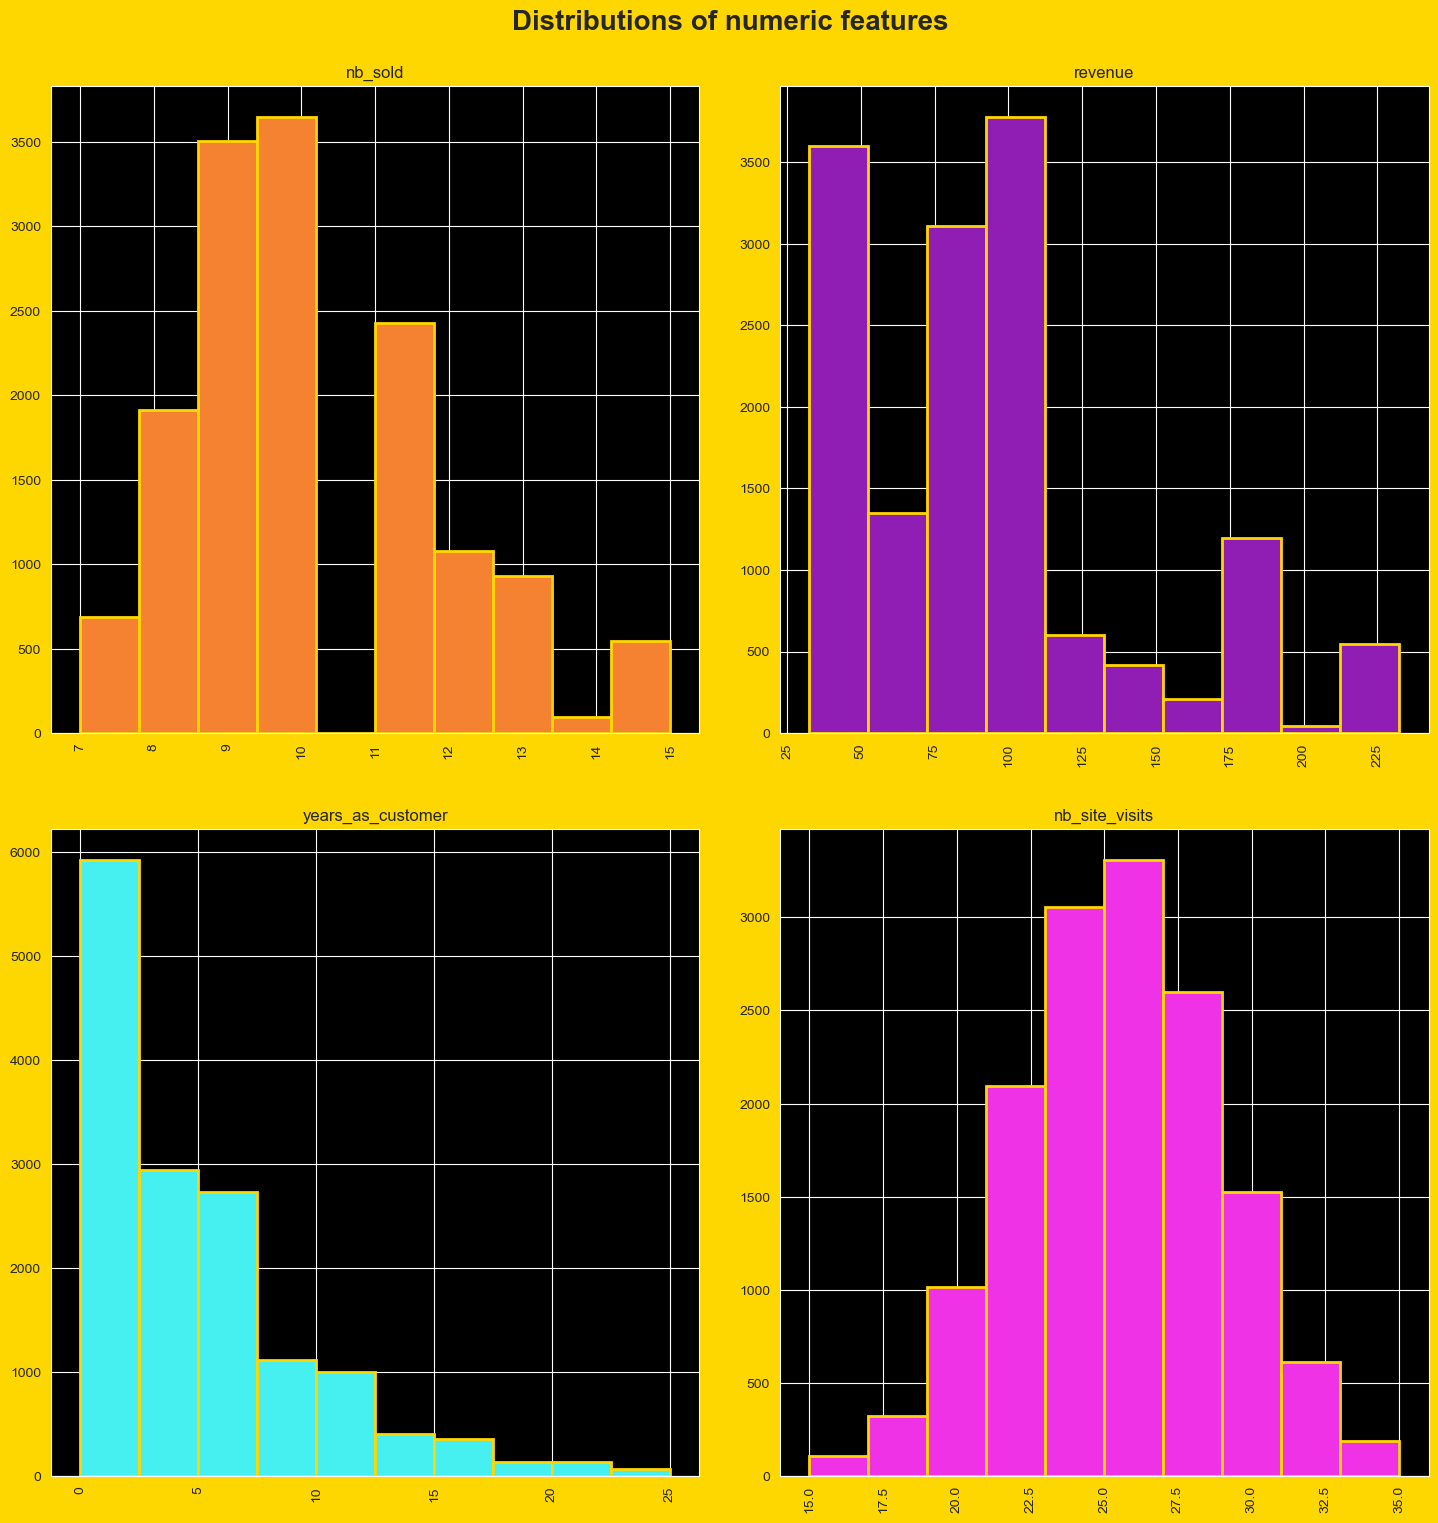

In [155]:
numeric_var = sales_3.select_dtypes(include='number')

numeric_var = numeric_var.drop('week', axis=1)


# Prepare color list assign each plot a different color
color_list=['#f58231', '#911eb4', '#46f0f0', '#f032e6']


numeric_var_names=list(numeric_var.columns)

fig, axs = plt.subplots(2,2, figsize=(15,15))

fig.set_facecolor("gold")

# axs[2,2].set_axis_off()
# axs[2,2].set_axis_off()

plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)
plt.tight_layout(h_pad=5, pad=3)

axs = axs.ravel()
fig.suptitle('Distributions of numeric features',  x=0.5, y=1.02, 
             fontsize=20, fontweight='bold')


for i in range(0,4):
    axs[i].set_facecolor("black")
    axs[i].hist(numeric_var.iloc[:,i], color=color_list[i], edgecolor='gold', linewidth=2)
    axs[i].set_title(numeric_var_names[i])
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(90)    
        
print("Task:\nInclude four different graphics showing single variables only to demonstrate the characteristics of data.")   
plt.show()
    

In [156]:
print(f"years_as_customers -  statistics")
sales_3['years_as_customer'].describe().round(2)

years_as_customers -  statistics


count    14835.00
mean         4.79
std          4.56
min          0.00
25%          1.00
50%          3.00
75%          7.00
max         25.00
Name: years_as_customer, dtype: float64

<h2>Findings: years as customer</h2>
<ul>
    <li><strong>Skewed to the right:</strong> The histogram shows that the majority of <em>years_as_customer</em> values are clustered toward the left (lower values), with fewer customers in the higher range (right tail). This confirms a right-skewed distribution.</li>
    <li><strong>Findings based on the histogram:</strong>
        <ul>
            <li><strong>Most customers are recent (0-5 years):</strong> The majority of customers are relatively new, indicating a high rate of customer acquisition in recent years.</li>
            <li><strong>Fewer long-term customers (12-20 years):</strong> The declining frequency for customers with longer tenures suggests that retaining customers for extended periods is rare.</li>
        </ul>
    </li>
</ul>

<h2>Key Insights</h2>
<ul>
    <li><strong>Customer Loyalty Trends:</strong>
        <ul>
            <li>The data suggests <em>low customer retention</em> beyond a certain period, possibly highlighting issues with loyalty-building strategies.</li>
            <li>Most customers leave or disengage after a few years (possibly around 5 years).</li>
        </ul>
    </li>
    <li><strong>Improvement Opportunities:</strong>
        <ul>
            <li>Customer retention strategies could be implemented to encourage longer relationships:
                <ul>
                    <li>Personalized offers or loyalty programs for long-term customers.</li>
                    <li>Enhanced services for customers reaching key milestones (e.g., 5-year anniversary).</li>
                </ul>
            </li>
            <li>Analyze why customers churn beyond certain periods.</li>
        </ul>
    </li>
    <li><strong>Business Growth Dynamics:</strong>
        <ul>
            <li>If most customers are recent, this could also indicate a <em>rapidly growing business</em>:
                <ul>
                    <li>A growing customer base with a high influx of new customers might explain the distribution.</li>
                </ul>
            </li>
            <li>Investigate whether the right skew is due to customer churn or business expansion.</li>
        </ul>
    </li>
    <li><strong>Further Analysis:</strong>
        <ul>
            <li>Examining churn rates across different customer age groups to confirm retention challenges.</li>
            <li>Exploring <em>sales_method</em> to identify strategies better suited for long-term customer engagement.</li>
        </ul>
    </li>
</ul>

In [157]:
print(f"nb_site_visits -  statistics")
sales_3['nb_site_visits'].describe().round(2)

nb_site_visits -  statistics


count    14835.00
mean        24.98
std          3.46
min         15.00
25%         23.00
50%         25.00
75%         27.00
max         35.00
Name: nb_site_visits, dtype: float64

<h3>Findings: nb site visits</h3>
<ul>
    <li><strong>Normal Distribution:</strong>
        <ul>
            <li>The number of site visits in the last six months follows a roughly normal distribution.</li>
            <li>The majority of customers visit the website around 25 times, with most falling between 15 and 35 visits.</li>
            <li>This suggests a consistent and predictable engagement pattern.</li>
        </ul>
    </li>
    <li><strong>Engagement Levels:</strong>
        <ul>
            <li>A centered mean at 25 visits indicates moderate customer engagement.</li>
            <li>Customers falling within one standard deviation (15–35 visits) are the core audience with standard engagement levels.</li>
            <li>Outliers (e.g., customers with significantly fewer or more visits) may represent disengaged users or highly active customers.</li>
        </ul>
    </li>
</ul>


<h3>Key Insights from <code>nb_site_visits</code> Analysis</h3>
<ul>
    <li><strong>Engagement Consistency:</strong>
        <ul>
            <li>The data suggests consistent customer engagement, as indicated by the normal distribution centered around 25 visits.</li>
            <li>The narrow standard deviation (<code>3.45</code>) means the number of visits is concentrated within a predictable range for most customers.</li>
        </ul>
    </li>
    <li><strong>Core Audience:</strong>
        <ul>
            <li>Most customers (approximately 68%) fall within one standard deviation (<code>15–35</code> visits), highlighting a standard engagement pattern.</li>
            <li>This group can be considered the "core audience," forming the backbone of the site's traffic.</li>
        </ul>
    </li>
    <li><strong>Outliers and Segments:</strong>
        <ul>
            <li><strong>Low-Engagement Customers:</strong> Those near the minimum (<code>15</code> visits) may be occasional users, suggesting potential for targeted engagement campaigns.</li>
            <li><strong>High-Engagement Customers:</strong> Those near the maximum (<code>35</code> visits) represent power users, offering opportunities for loyalty programs or premium offerings.</li>
        </ul>
    </li>
    <li><strong>Median and Quartile Analysis:</strong>
        <ul>
            <li>Median (<code>25</code>) aligns closely with the mean (<code>24.94</code>), reinforcing the idea of balanced engagement across the customer base.</li>
            <li>Interquartile range (<code>23–27</code>) suggests limited variability in the central 50% of customers, which simplifies planning and targeting efforts for standard users.</li>
        </ul>
    </li>
    <li><strong>Business Implications:</strong>
        <ul>
            <li><strong>Retention:</strong> Engage low-frequency users with incentives to increase site visits and activity.</li>
            <li><strong>Loyalty:</strong> Build specialized offerings for the highly engaged segment to maximize their value.</li>
            <li><strong>Monitoring:</strong> Use the predictable distribution to benchmark engagement metrics and quickly identify deviations in customer behavior over time.</li>
        </ul>
    </li>
</ul>


<b>Note:</b>
<ul>
<li>The revenue distribution as a major focus of ths report is analysed below.</li>
<li>The nb_sold variable is connected to the revenue-variable.<br>
revenue = price * nb_sold<br>
Therefore a dedicated analysis is not conducted here.
</li>
<li>Recommendations are given in the last sections of this report.</li>
</ul>

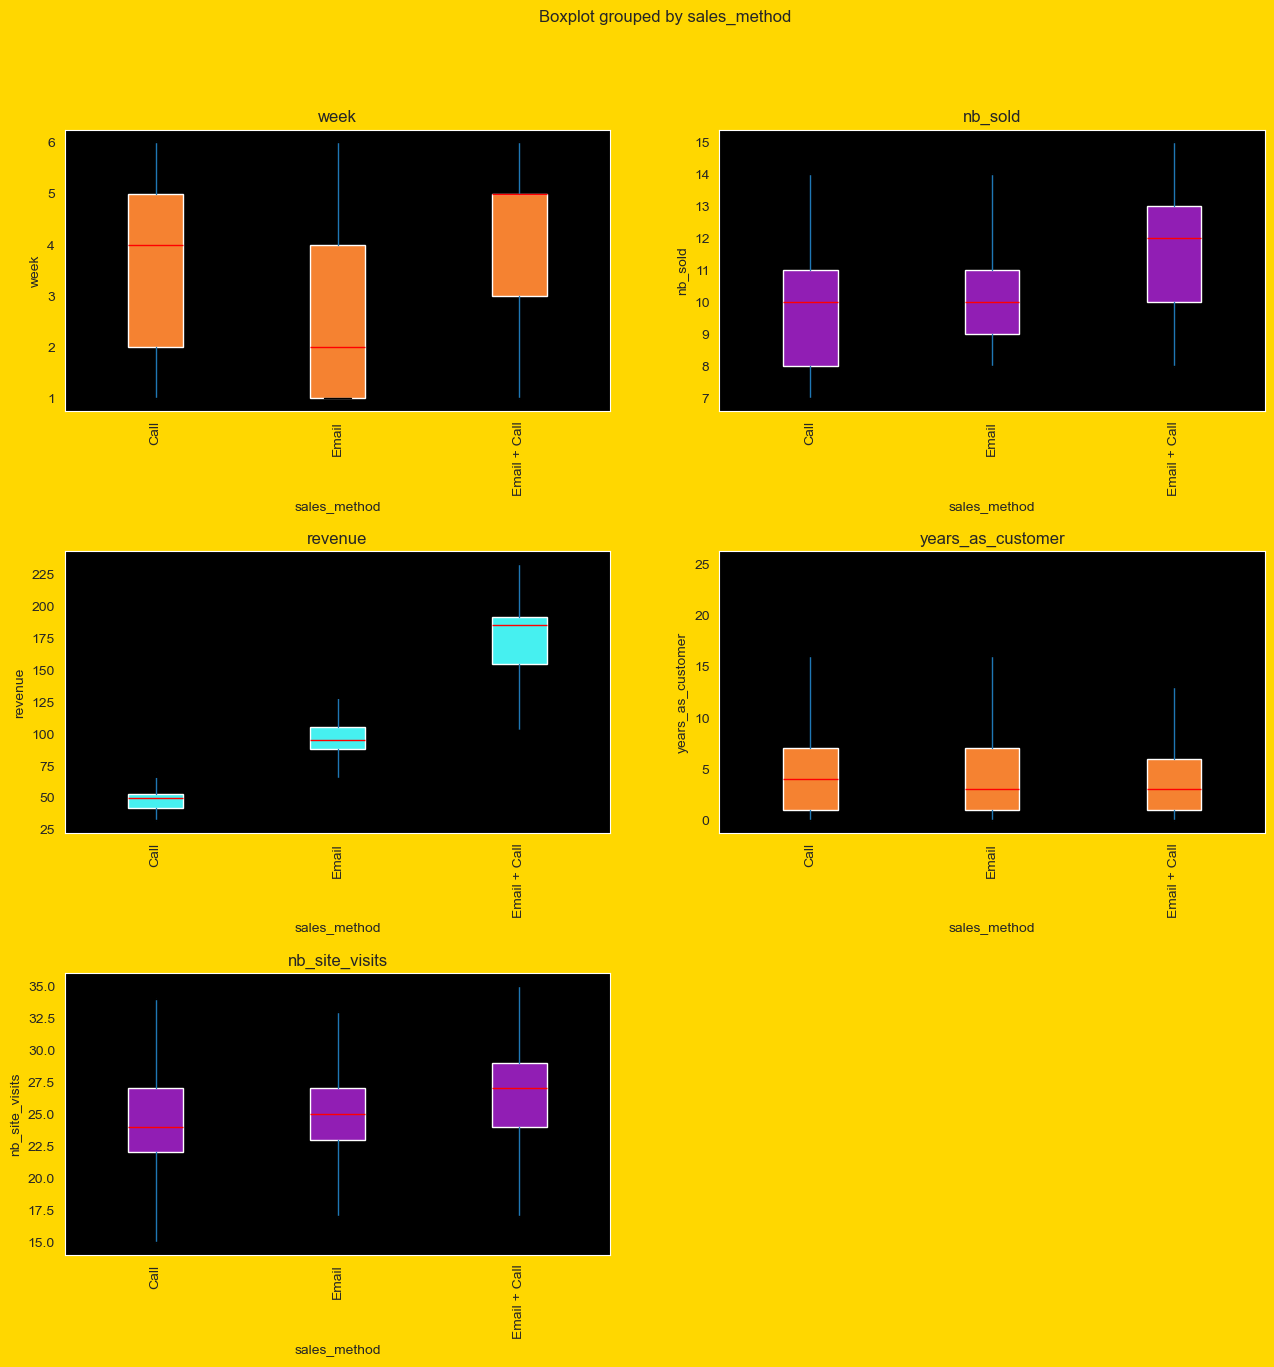

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Assuming sales_3 is your DataFrame
numeric_vars = sales_3.select_dtypes(include='number')
object_vars = sales_3.select_dtypes(include='object')

# Prepare color list for the box plots
color_list = ['#f58231', '#911eb4', '#46f0f0']

# Get the names of numeric variables
numeric_var_names = list(numeric_vars.columns)

# Focus only on the 'sales_method' categorical variable
obj_var = 'sales_method'

# Create box plots for each numeric variable against 'sales_method'
num_vars = len(numeric_var_names)
num_rows = (num_vars + 1) // 2  # Calculate number of rows needed

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
fig.set_facecolor("gold")

# Flatten the axs array for easy indexing
axs = axs.ravel()

plt.subplots_adjust(left=0.2, bottom=0.1, right=0.8, top=0.9, wspace=.3, hspace=0.5)
fig.suptitle(f'Box Plots of Numeric Features by {obj_var}', fontsize=20, fontweight='bold')

for i in range(num_vars):
    axs[i].set_facecolor("black")
    
    # Create a box plot
    sales_3.boxplot(column=numeric_var_names[i], by=obj_var, ax=axs[i], grid=False, 
                    patch_artist=True, 
                    boxprops=dict(facecolor=color_list[i % len(color_list)], color='white'),
                    medianprops=dict(color='red'))
    
    axs[i].set_title(numeric_var_names[i], fontsize=12)
    axs[i].set_xlabel(obj_var, fontsize=10)
    axs[i].set_ylabel(numeric_var_names[i], fontsize=10)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-tick labels for better visibility

# Hide any unused subplots
for j in range(num_vars, len(axs)):
    axs[j].set_visible(False)

plt.show()


<h3>Findings:</h3>
<ul>
    <li>The box plots of numeric features by sales method illustrate the relationships between numerical features and the chosen sales methods.</li>
    <li>For the features <code>nb_sold</code> and <code>revenue</code>, the median increases sequentially across the methods: "Call", "Email", and "Email + Call". This trend is especially pronounced for the <code>revenue</code> variable.</li>
    <li>The increase in the median is less evident for <code>nb_site_visits</code>, but the pattern still holds.</li>
    <li>The median for <code>years_as_customer</code> does not appear to be influenced by the sales method.</li>
</ul>

<h3>Key Insights:</h3>
<ul>
    <li>It is unclear whether the observed relationships are solely due to the sales strategy employed by the sales team. For instance, salespeople might have deliberately targeted high-revenue customers with the "Email + Call" approach. If true, this could distort the data. It is recommended to conduct A/B testing to isolate the influence of sales methods on revenue.</li>
    <li>Based on the current data, the "Email + Call" sales approach appears to be the most effective for generating higher revenue.</li>
    <li>The similar median values for <code>nb_site_visits</code> across all sales methods suggest that the website is a valuable communication tool, regardless of the sales method used.</li>
</ul>


<h2>How many customers were there for each approach?</h2>

In [161]:
# sales_3.info()
sales_method_by_customer = \
sales_3.groupby('sales_method')['customer_id'].nunique()

sales_method_by_customer

sales_method
Call            4914
Email           7401
Email + Call    2520
Name: customer_id, dtype: int64

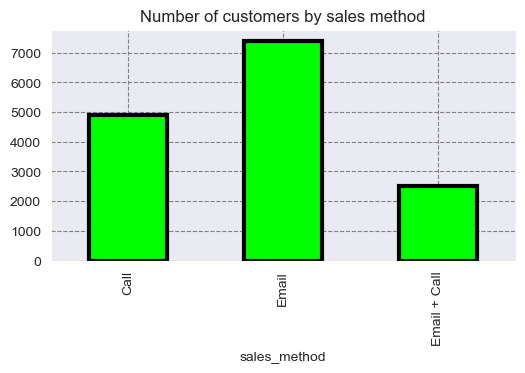

In [162]:
sales_method_by_customer.plot.bar(edgecolor='black', linewidth=3, figsize=(6,3),
                                  color='lime', 
                                  title='Number of customers by sales method')

plt.grid(linestyle='--', color='gray')

plt.show()

<h2>What does the spread of the revenue look like overall? And for each method?</h2>

<p>
Revenue Numeric: revenue from the sales, rounded to 2 decimal places.
</p>

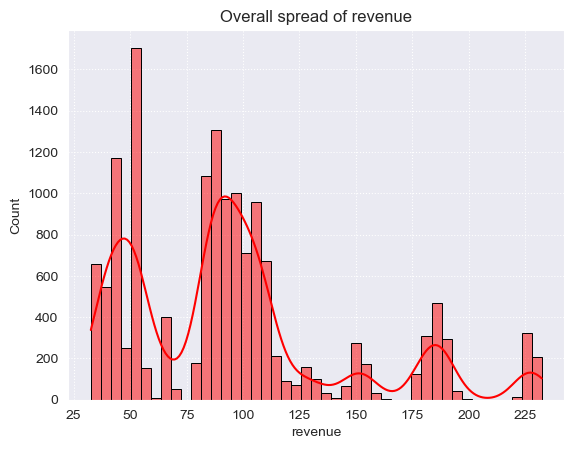

In [163]:
sns.histplot(x='revenue', data=sales_3, kde=True, color='red', edgecolor='black')
plt.grid(linestyle=":")
plt.title('Overall spread of revenue')

plt.show()

In [164]:
sales_3['revenue'].describe().round(2)

count    14835.00
mean        95.03
std         47.78
min         32.54
25%         52.76
50%         89.95
75%        107.84
max        232.36
Name: revenue, dtype: float64

<h3>Findings:</h3>

<ul>
    <li>
        <strong>Right-Skewed Distribution:</strong>
        <ul>
            <li>The histogram suggests that revenue is somewhat right-skewed.</li>
            <li>While the bulk of revenues cluster around the mean and median, there is a long tail toward higher revenue values.</li>
        </ul>
    </li>
    <li>
        <strong>Descriptive Statistics:</strong>
        <ul>
            <li>The mean revenue (<strong>$93.75</strong>) is slightly higher than the median (<strong>$89.52</strong>), which supports the presence of a right skew.</li>
            <li>The minimum revenue starts at <strong>$32.54</strong>, with most revenues within the interquartile range (IQR: <strong>$52.49–$107.27</strong>).</li>
            <li>Outliers exist, with the maximum revenue reaching <strong>$232.36</strong>.</li>
            <li>The gap between the 75th percentile and the max suggests there are fewer high-revenue instances but enough to extend the tail.</li>
        </ul>
    </li>
    <li>
        <strong>Gap in Histogram:</strong>
        <ul>
            <li>The revenue gap around <strong>$75–$80</strong> might indicate:</li>
            <ul>
                <li>Missing data points in this range.</li>
                <li>Possible segmentation or pricing gaps in the product or sales approach.</li>
                <li>Repercussions of the outlier removal.</li>
            </ul>
        </ul>
    </li>
    <li>
        <strong>Fluctuations on the Left:</strong>
        <ul>
            <li>Revenue fluctuating in lower ranges (left side of the histogram) suggests inconsistent customer spending patterns.</li>
            <li>This could be due to smaller purchases, promotional offers, or customer types (e.g., low-value buyers).</li>
        </ul>
    </li>
</ul>


<h2>And for each method?</h2>

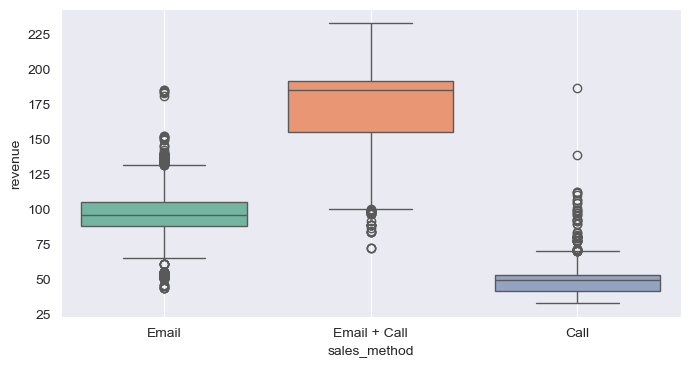

In [165]:
plt.figure(figsize=(8,4))
sns.boxplot(data=sales_3, x='sales_method', y='revenue', palette='Set2')
plt.title("")
plt.grid()
plt.show()

<h3>Findings:</h3>
<p>
The graphic above reinforces the "Email + Call"-method associated with the highest revenue.<br>
The median of this method is visible higher than of the other methods.<br>
The median differences are calculated below.
</p>

In [166]:
sales_method_revenue = \
sales_3.groupby('sales_method')['revenue'].median().reset_index()

sales_method_revenue.rename(columns={'revenue':'median'}, inplace=True)


sales_method_revenue['diff'] = sales_method_revenue['median'].diff()
sales_method_revenue.fillna(0, inplace=True)

print(type(sales_method_revenue))
print(sales_method_revenue )


<class 'pandas.core.frame.DataFrame'>
   sales_method   median    diff
0          Call   49.530   0.000
1         Email   95.330  45.800
2  Email + Call  184.595  89.265


<h2>Was there any difference in revenue over time for each of the methods?</h2>

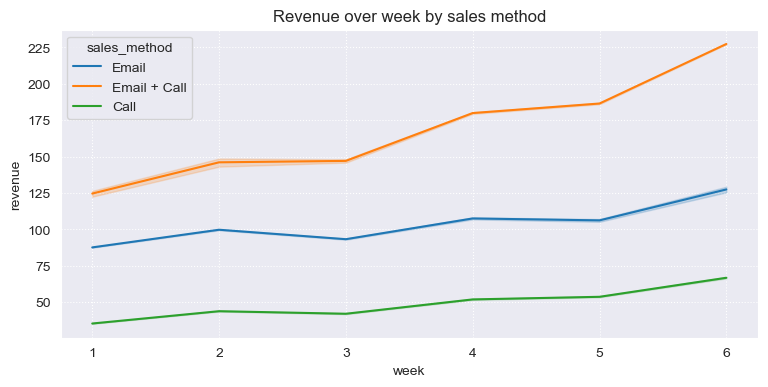

In [167]:
plt.figure(figsize=(9,4))
sns.lineplot(data=sales_3, x='week', y='revenue', hue='sales_method')
plt.title("Revenue over week by sales method")
plt.grid(linestyle=':')
plt.show()

<h3>Findings</h3>

<p>
The graphic shows clearly differences. The sales methods lines are clearly separated.
The "Email + Call" method shows still the highest revenue. It is aligned with the findings before.
</p>

<h2>Section 3: Sales method & business metric recommendation </h2>

<p>
In this part questions are answered concerning the business operations
of Pens and Printers immediately .
</p>

<h2>
Based on the data, which method would you recommend we continue to use? 
</h2>

<p>
(Some of these methods take more time from the team so they may not be the best for us
to use if the results are similar.)
</p>

<p>
According to the graphic "Revenue over week by sales method" the best approach is "Email+Call".<br>
It is generating the highest revenue.<br>
However, according to the graphic 'Number of customers by sales method' this group contains only 2153 customers compared to 4684 in the Call group and 6804 in the Email group.
</p>

<p>
Considering this the conclusion in favor of "Email+Call" might not be fully valid.<br>
For valid statistically conclusions it would have been better to randomly assign the customers to same size groups.<br>
As this is not the case other factors then the sales method could influence the revenue:
</p>

<ul>
<li>Email+Call might generate higher total revenue because each customer in this group spends significantly more on average compared to other methods.</li>
<li>However, Email has the highest number of customers, and its contribution might be diluted because individual spending could be lower.</li>
</ul>

<p>
For better insights it is necessary to account for the disparities in the customer groups.<br>
This is done by applying additional methods.
</p>

<h3> Calculating the average revenue per customer</h3>

<p>
As explained above the different between the group sizes are a challenge for the validity of the recommendations.
That is why revenue is now calculated as the ratio of revenue and number of customers
in each sales method group.
This is the metric "average revenue per customer" below.
It is understood as the "normalisation" of revenue by numbers of customers.
</p>

In [168]:
# Calculate the number of unique customers for each sales method
# sales_method_by_customer = sales_3.groupby('sales_method')['customer_id'].nunique()
# print(sales_method_by_customer)

# Calculate the total revenue for each sales method
sales_method_revenue = sales_3.groupby('sales_method')['revenue'].sum()

# Compute the average revenue per customer
avg_revenue_per_customer = (sales_method_revenue / sales_method_by_customer).round(2)

# Showing
print(avg_revenue_per_customer)


sales_method
Call             48.08
Email            96.72
Email + Call    181.63
dtype: float64


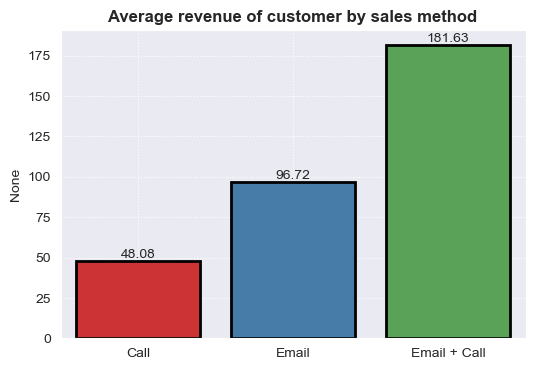

In [169]:
avg_revenue_per_customer_values = avg_revenue_per_customer.values.tolist()
sales_methods_index = avg_revenue_per_customer.index.tolist()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=sales_methods_index, y=avg_revenue_per_customer, edgecolor='black', linewidth=2, palette='Set1')
plt.grid(linestyle=':')
plt.title('Average revenue of customer by sales method', fontweight='bold')

# data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.show()

<b>Findings:</b>

<p>
With Email + Call = 182.95 in revenue this method is confirmed as the strongest.<br>
However, how siginificant is the difference in means of the three groups? To answer this statistically methods are necessary.
</p>

<h2>Statistically analysis</h2>

<h3>Are the differences in average revenue by customer for every sales method statistically significant?</h3>

<h3>ANOVA - Analysis of variances</h3>

<p>
Analysis of variance (ANOVA) is a collection of statistical models and their associated estimation procedures (such as the "variation" among and between groups) used to analyze the differences among means. (Wikipedia)
</p>

In [170]:
from scipy.stats import f_oneway

# Group revenues by sales method
call_revenue = sales_3[sales_3['sales_method'] == 'Call']['revenue']
email_revenue = sales_3[sales_3['sales_method'] == 'Email']['revenue']
email_call_revenue = sales_3[sales_3['sales_method'] == 'Email + Call']['revenue']

# Perform One-Way ANOVA
anova_result = f_oneway(call_revenue, email_revenue, email_call_revenue)

print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

# Interpretation

print(f'Findings of the ANOVA:')
if anova_result.pvalue < 0.05:
    print("The differences in average revenue per customer are statistically significant.")
else:
    print("The differences in average revenue per customer are not statistically significant.")


F-statistic: 53557.121227801
P-value: 0.0
Findings of the ANOVA:
The differences in average revenue per customer are statistically significant.


<h2>Tukey's range test</h2>

<p>
also known as Tukey's test, Tukey method, Tukey's honest significance test, or Tukey's HSD (honestly significant difference) test,[1] is a single-step multiple comparison procedure and statistical test. It can be used to correctly interpret the statistical significance of the difference between means that have been selected for comparison because of their extreme values. (Wikipedia)
</p>

In [171]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

customer_revenue = sales_3.groupby(['sales_method', 'customer_id'])['revenue'].sum().reset_index()

# Perform Tukey HSD
tukey_result = pairwise_tukeyhsd(
    endog=customer_revenue['revenue'],       # The dependent variable
    groups=customer_revenue['sales_method'], # The groups to compare
    alpha=0.05                               # Significance level
)

# Print results
print(tukey_result)



    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1    group2    meandiff p-adj  lower    upper   reject
-----------------------------------------------------------
  Call        Email  48.6416   0.0  47.9228  49.3604   True
  Call Email + Call 133.5486   0.0 132.5914 134.5057   True
 Email Email + Call   84.907   0.0   84.006  85.8079   True
-----------------------------------------------------------


<b>Findings:</b>

<p>
For all group combinations the Null-Hypothesis is rejected and the alternative
hypothesis is accepted. There is a significant difference in means for all combinations.
</p>

<p>
Based on ANOVA and the Tukey test the sales method "Email + Call" creates the highest average revenue per customer, even if the customers are not randomly assigned to every sales method group. This could be done later in an controlled Experiment with A/B-testing. There remains a caveat. The costs for every sales method per customer are unknown. If the sales costs per customer for "Email + Call" are substantially higher, then the recommendation for this approach might not be viable and lead to a economic loss. As this below the difference in revenue between the groups are high. The increased revenue could compensate for higher revenue therefore. Based on given information the recommendation for "Email + Call" is therefore maintained.
</p>


In [172]:
avg_revenue_per_customer_df = pd.DataFrame(avg_revenue_per_customer,
                                          columns=['revenue'])


avg_revenue_per_customer_df['difference'] = \
avg_revenue_per_customer_df['revenue'].diff()

avg_revenue_per_customer_df

,revenue,difference
sales_method,,
Call,48.08,NaN
Email,96.72,48.64
Email + Call,181.63,84.91


<h3>Definition of a metric for the business to monitor</h3>
<ul>
<li>How should the business monitor what they want to achieve?</li>
<li>Estimate the initial value(s) for the metric based on the current data?</li>
</ul>

<p>
A business metric or key performance indicator is necessary to monitor the development of the business of "Pens and Printers". <b>The business metric proposed here is the "normalized_revenue"</b>. 
</p>

<h3>Arguments for Using Normalized Revenue</h3>

<ul>
    <li>
        <strong>Customer-Centric Measurement:</strong>
        <ul>
            <li>Normalized revenue accounts for variability in the number of customers served by each sales method, providing a fair comparison between methods.</li>
            <li>It emphasizes the efficiency of revenue generation on a per-customer basis, aligning with goals to maximize customer value.</li>
        </ul>
    </li>
    <li>
        <strong>Advantages of Normalizing Revenue:</strong>
        <ul>
            <li>Removes bias caused by differences in customer base size for each sales method, ensuring fair evaluation of method performance.</li>
            <li>Highlights per-customer efficiency, offering deeper insights into sales strategy effectiveness.</li>
            <li>Allows direct comparison of revenue performance across methods, independent of customer volume.</li>
        </ul>
    </li>
    <li>
        <strong>Method Performance Insight:</strong>
        <ul>
            <li>It highlights which sales methods yield the highest revenue per customer, helping allocate resources to the most effective strategies (e.g., focusing on "Email + Call").</li>
        </ul>
    </li>
    <li>
        <strong>Week-to-Week Trends:</strong>
        <ul>
            <li>By breaking it down by week, the metric allows tracking of performance over time, identifying trends or seasonality in sales methods.</li>
        </ul>
    </li>
    <li>
        <strong>Actionable for Optimization:</strong>
        <ul>
            <li>The metric is actionable as it identifies which sales methods need improvement or further investment.</li>
        </ul>
    </li>
    <li>
        <strong>Alignment with Business Goals:</strong>
        <ul>
            <li>If the business aims to maximize revenue while efficiently managing customer interactions, normalized revenue directly aligns with these objectives.</li>
        </ul>
    </li>
</ul>


<h3>Calculate normalized revenue (average revenue per customer for each week and method</h3>

In [173]:

normalized_revenue = sales_3.groupby(['week', 'sales_method'])['revenue'].sum() / \
                     sales_3.groupby(['week', 'sales_method'])['customer_id'].nunique()

# Convert to DataFrame
normalized_revenue = normalized_revenue.reset_index()  # Converts Series to DataFrame
normalized_revenue.rename(columns={0: 'normalized_revenue'}, inplace=True)  # Rename column if unnamed

pivoted_normalized_revenue = normalized_revenue.pivot(index='week', columns='sales_method', values='normalized_revenue')

print(normalized_revenue.head())

   week  sales_method  normalized_revenue
0   1.0          Call           35.423318
1   1.0         Email           87.670859
2   1.0  Email + Call          124.622945
3   2.0          Call           43.879649
4   2.0         Email           99.798267


<h3>How should the business monitor what they want to achieve?</h3>

<p>
The business should monitor the metric "normalized_revenue" with a table like above and a dashboard of graphics like below. This enables to be up to date and support the operations to react flexibly and quickly to fluctuations.
</p>

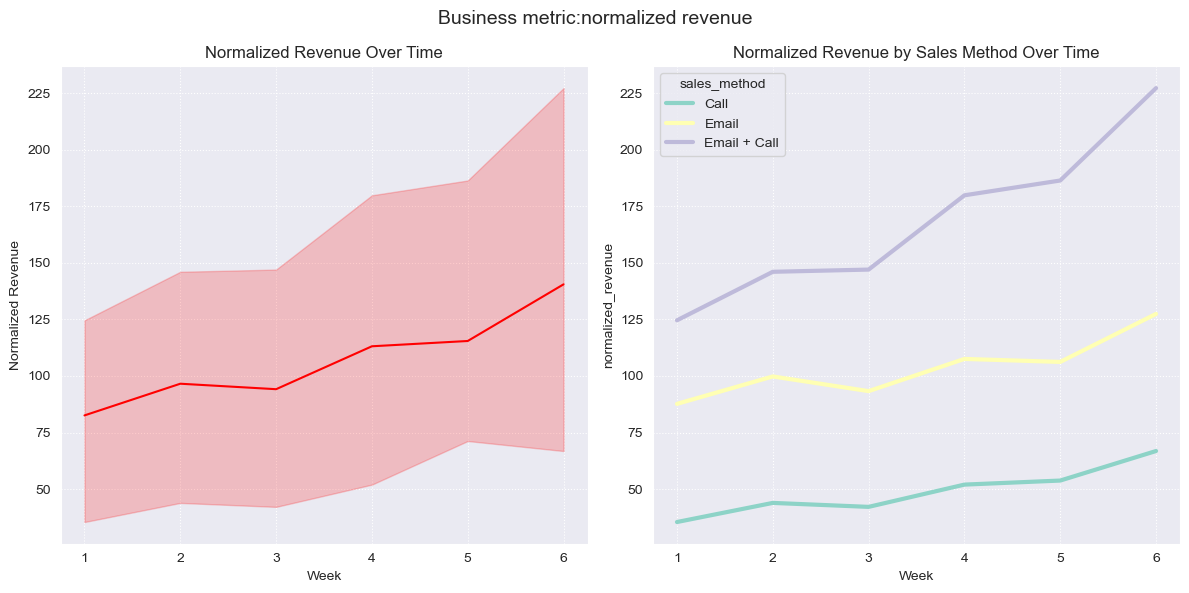

In [174]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))  
plt.suptitle('Business metric:normalized revenue', fontsize=14)

sns.set_style('darkgrid')
# First plot (overall normalized revenue)
sns.lineplot(
    data=normalized_revenue,
    x='week', 
    y='normalized_revenue', color='red',
    ax=ax[0]  
)
ax[0].grid(linestyle=':')  # Set grid for this subplot
ax[0].set_title('Normalized Revenue Over Time')
ax[0].set_xlabel('Week')
ax[0].set_ylabel('Normalized Revenue')

# Second plot (normalized revenue by sales method)
sns.lineplot(
    data=normalized_revenue,
    x='week', 
    y='normalized_revenue',  
    hue='sales_method',
    palette="Set3",
    linewidth=3,
    ax=ax[1]  
)
ax[1].grid(linestyle=':')  # Set grid for this subplot
ax[1].set_title('Normalized Revenue by Sales Method Over Time')
ax[1].set_xlabel('Week')

plt.tight_layout()  # Adjust spacing
plt.show()


<h2>Section 4:<br>Final summary including recommendations that the business should undertake</h2>

<h1>Summary</h1>


<h2>Business goals</h2>

<ul>
    <li>Finding the best sales approach for the new product line.</li>
    <li>According to the assumption, the best sales approach should create the highest revenue.</li>
    <li>General revenue optimization regarding the features as revenue levers.</li>
    
</ul>

<p>The analysis below were conducted by incorporating the business goals as foundation.</p>


<p>This analysis was structured into four main sections:</p>

<ul>
    <li>
        <strong>Section 1: Data Validation & Cleaning</strong><br>
        This section included handling missing values, outliers, data types, string corrections, etc.
    </li>
    <li>
        <strong>Section 2: Exploratory Data Analysis</strong><br>
        This section investigated the distributions of variables using histograms and explored the relationships between sales_method and revenue, site visits, years as customers, and items sold.<br>
        It also visualized the revenue variable over time (week) using line plots.
    </li>
    <li>
        <strong>Section 3: Sales method & business metric recommendation </strong><br>
        There were two main questions: 
        <ul>
            <li>The first concerned the recommendation for the sales method. After adjusting for different group sizes by calculating the "Email+Call" method, this was recommended. The advice was supported by a statistical analysis using ANOVA and the Tukey test.</li>
            <li>The second question focused on the business metric to monitor. The suggested metric was "Normalized Revenue." After calculating the metric, it was implemented into line plots to monitor it over weeks and by sales method.</li>
        </ul>
    </li>
    <li>
        <strong>Section 4: Final Recommendations</strong><br>
        This section concludes the analysis with recommendations based on the insights obtained.
    </li>
</ul>


<h1>Business Recommendations</h1>

<h2>Main Recommendations</h2>

<ul>
    <li>
        <strong>Sales Method:</strong>
        <ul>
            <li>
                The recommended sales method is the "Email+Call" approach.<br>
                The reasoning behind this recommendation was thoroughly explained above.
            </li>
        </ul>
    </li>
    <li>
        <strong>Business Metric:</strong>
        <ul>
            <li>
                The recommended business metric is the "Normalized Revenue" ratio.<br>
                The reasoning behind this recommendation was thoroughly explained above.
            </li>
        </ul>
    </li>
</ul>


<h2>Recommendations: revenue</h2>

<ul>
    <li>
        <strong>Revenue Segments:</strong>
        <ul>
            <li>
                <strong>Lower Revenue Customers:</strong> Customers spending below the median could be casual buyers or less engaged. 
                Focused upselling or targeted offers might help increase their spending.
            </li>
            <li>
                <strong>High Revenue Customers:</strong> The tail represents premium or highly engaged customers. 
                Develop retention and loyalty strategies for this segment.
            </li>
        </ul>
    </li>
    <li>
        <strong>Sales Strategy for Gaps:</strong>
        <ul>
            <li>Analyze why revenues in the <strong>$75–$80</strong> range are missing or sparse:</li>
            <ul>
                <li>Are certain products or price points missing?</li>
                <li>Could targeted marketing or product development fill this gap?</li>
            </ul>
        </ul>
    </li>
    <li>
        <strong>Revenue Consistency:</strong>
        <ul>
            <li>The fluctuations in lower ranges could indicate variability in sales methods or customer preferences.</li>
            <li>Standardizing the approach across sales methods might smooth revenue variability.</li>
        </ul>
    </li>
</ul>



<h2>Recommendations: nb_site_visits</h2>
<ul>
    <li><strong>Core Customer Insights:</strong>
        <ul>
            <li>The consistent distribution shows that most customers engage with the website regularly.</li>
            <li>Focus marketing efforts on maintaining and slightly increasing engagement among this group.</li>
        </ul>
    </li>
    <li><strong>Retention Opportunities:</strong>
        <ul>
            <li>For customers with fewer than 15 visits:
                <ul>
                    <li>Investigate reasons for low engagement (e.g., technical issues, lack of appealing content).</li>
                    <li>Target them with incentives like personalized email campaigns or promotions to re-engage.</li>
                </ul>
            </li>
        </ul>
    </li>
    <li><strong>Leverage Highly Engaged Customers:</strong>
        <ul>
            <li>Customers visiting more than 35 times may be highly engaged or loyal.</li>
            <li>Offer exclusive benefits or loyalty rewards to deepen their commitment.</li>
            <li>Use their behaviors as a model for understanding successful engagement strategies.</li>
        </ul>
    </li>
    <li><strong>Website Optimization:</strong>
        <ul>
            <li>Ensure the website provides value and encourages repeat visits, such as regular updates, easy navigation, and engaging content.</li>
            <li>Analyze user behavior during visits to understand what drives repeat engagement.</li>
        </ul>
    </li>
    <li><strong>Sales Strategy:</strong>
        <ul>
            <li>Customers with frequent visits are more likely to convert or already contribute significantly to sales.</li>
            <li>Tailor product recommendations or sales approaches to meet their interests.</li>
        </ul>
    </li>
    <li><strong>Further Analysis:</strong>
        <ul>
            <li>Segment the data by demographic or behavioral factors to uncover specific traits of high- or low-visit customers.</li>
            <li>Evaluate the correlation between site visits and metrics like revenue or purchase frequency to refine business strategies.</li>
        </ul>
    </li>
</ul>



<h2>Recommendations: years as customer</h2>
<ul>
    <li><strong>Implement a Customer Loyalty Program</strong>
        <ul>
            <li><strong>Action:</strong> Develop a loyalty program that rewards long-term customers with exclusive benefits, discounts, or personalized offers.</li>
            <li><strong>Rationale:</strong> This can incentivize customers to stay longer and increase their lifetime value, addressing the low retention rates observed beyond the 5-year mark.</li>
        </ul>
    </li>
    <li><strong>Enhance Customer Engagement Strategies</strong>
        <ul>
            <li><strong>Action:</strong> Create targeted marketing campaigns that celebrate customer milestones (e.g., 1-year, 5-year anniversaries) with special offers or recognition.</li>
            <li><strong>Rationale:</strong> By acknowledging and rewarding customer loyalty at key points, you can strengthen relationships and encourage continued engagement.</li>
        </ul>
    </li>
    <li><strong>Conduct Churn Analysis</strong>
        <ul>
            <li><strong>Action:</strong> Analyze customer feedback and churn data to identify common reasons for disengagement after a few years.</li>
            <li><strong>Rationale:</strong> Understanding the factors that lead to customer churn can help you address specific pain points and improve retention strategies.</li>
        </ul>
    </li>
    <li><strong>Tailor Services Based on Customer Segmentation</strong>
        <ul>
            <li><strong>Action:</strong> Segment customers based on their tenure and tailor services or communication strategies accordingly (e.g., different approaches for new customers vs. long-term customers).</li>
            <li><strong>Rationale:</strong> This targeted approach can enhance customer satisfaction and retention by ensuring that the services provided meet the evolving needs of different customer groups.</li>
        </ul>
    </li>
</ul>

<h2>Technical & Data Recommendations</h2>

<ul>
    <li>
        Conduct A/B testing to isolate the influence of sales methods on revenue. <br> 
        This should include the random assignment of customers to groups.
    </li>
    <li>
        Include cost information in order to enable profit calculation, rather than just revenue calculation.
    </li>
    <li>
        Create a dashboard to monitor revenue fluctuations in real-time and facilitate timely business actions.
    </li>
        <li>
        Collect more data to make advanced statistcal analysis like sampling possible.
    </li>
</ul>


In [175]:
# sales_3.info()
print(3+600)

603


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation